___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [138]:
!pip install yellowbrick

                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
                                              0.0/282.6 kB ? eta -:--:--
     ----                                     30.7/282.6 kB ? eta -:--:--
     -----                                   41.0/282.6 kB 1.9 MB/s eta 0:00:01
     -----                                   41.0/282.6 kB 1.9 MB/s eta 0:00:01
     -----                                   41.0/282.6 kB 1.9 MB/s eta 0:00:01
     -----                                   41.0/282.6 kB 1.9 MB/s eta 0:00:01
     -----                                   41.0/282.6 kB 1.9 MB/s eta 0:00:01
     -----     

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [4]:
file = "Mall_Customers.csv"
df = pd.read_csv (file)

In [5]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

#### Explore Data

You can rename columns to more usable, if you need.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [17]:
df.drop(columns = "CustomerID", inplace=True)

In [22]:
df.tail()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

In [18]:
df.shape

(200, 4)

In [28]:
df.rename(columns = {"Annual Income (k$)": "Annual_Income","Spending Score (1-100)": "Spending_Score" }, inplace = True)

In [65]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [30]:
df.duplicated().sum()

0

In [66]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [67]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [68]:
df.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [70]:
df.Annual_Income.value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual_Income, Length: 64, dtype: int64

In [71]:
df.Spending_Score.value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending_Score, Length: 84, dtype: int64

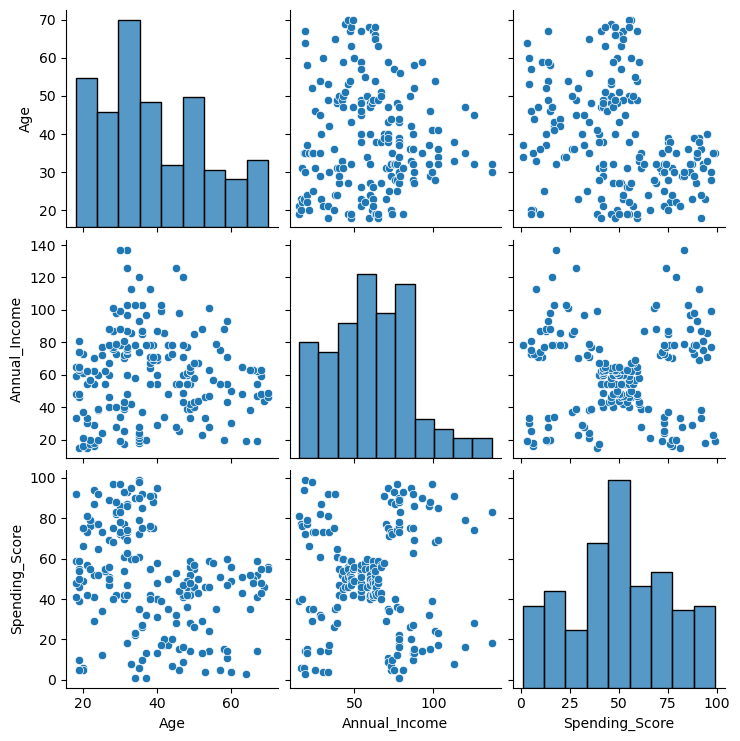

In [72]:
sns.pairplot(df)
plt.show()

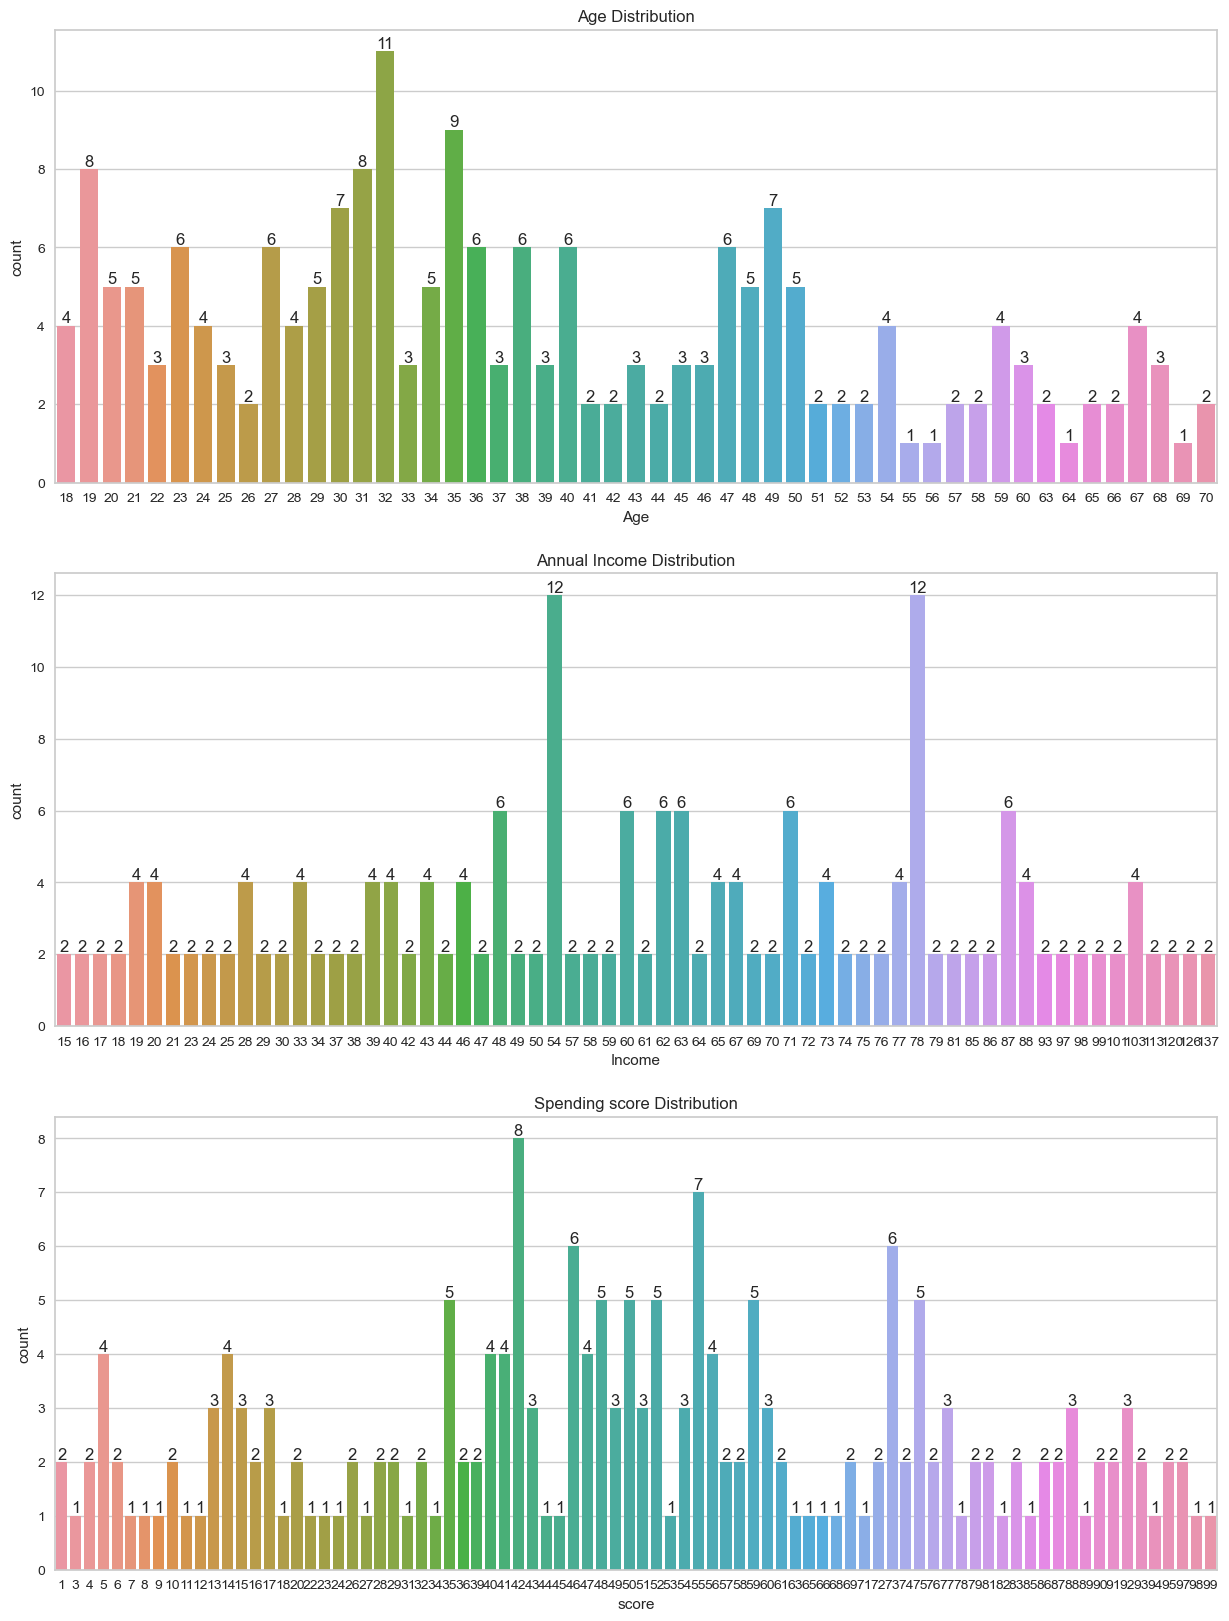

In [328]:
plt.figure(figsize=(15,20))

plt.subplot(3,1,1)
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0])

plt.subplot(3,1,2)
ax = sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income Distribution')
plt.xlabel('Income')
ax.bar_label(ax.containers[0])

plt.subplot(3,1,3)
ax = sns.countplot(x='Spending_Score', data=df)
plt.title('Spending score Distribution')
plt.xlabel('score')
ax.bar_label(ax.containers[0])
plt.show()

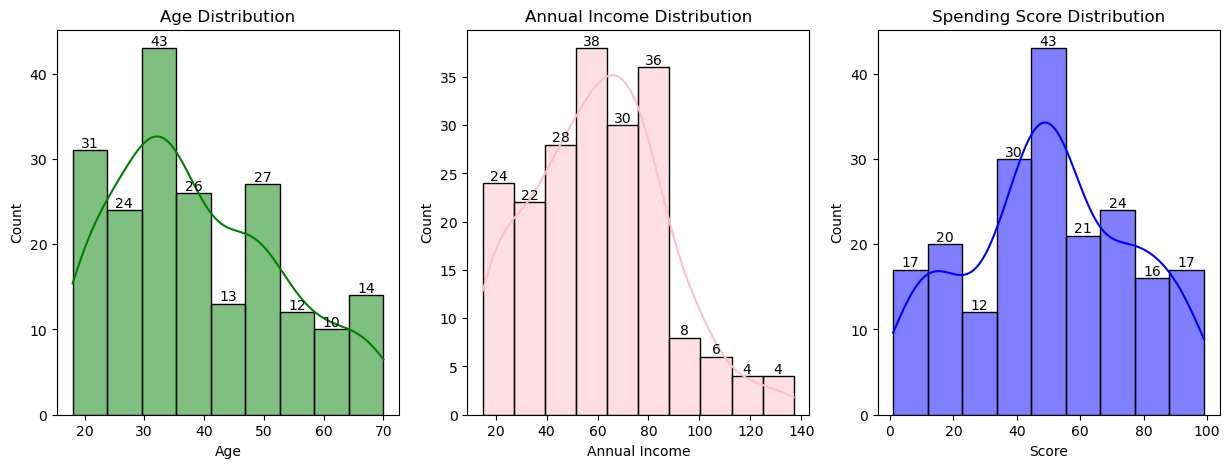

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = sns.histplot(x='Age', data=df, color='green', kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,3,2)
ax = sns.histplot(x ='Annual_Income', data=df, color='pink', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,3,3)
ax = sns.histplot(x ='Spending_Score', data=df, color='blue', kde = True)
plt.title('Spending Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

[Text(0, 0, '88'), Text(0, 0, '112')]

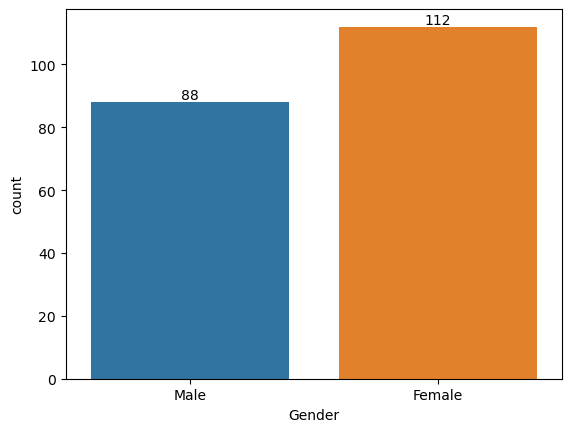

In [90]:
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(ax.containers[0])

<Axes: ylabel='Gender'>

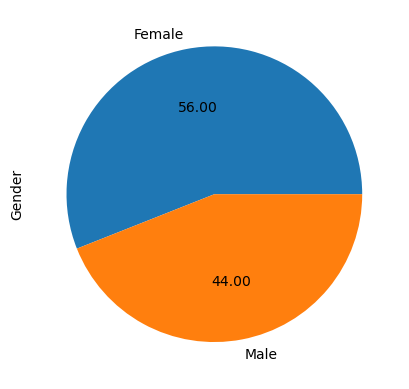

In [55]:
df.Gender.value_counts().plot.pie(autopct='%.2f')

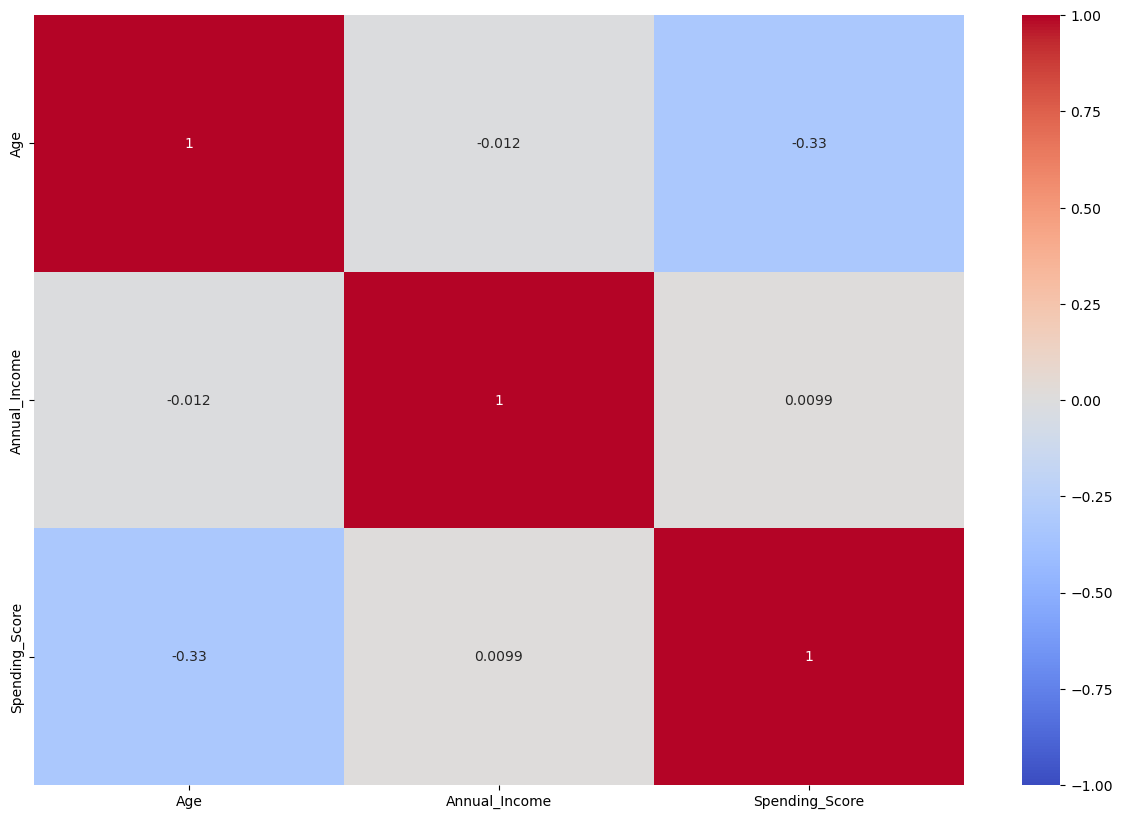

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),vmin = -1, vmax =1, cmap="coolwarm", annot = True);

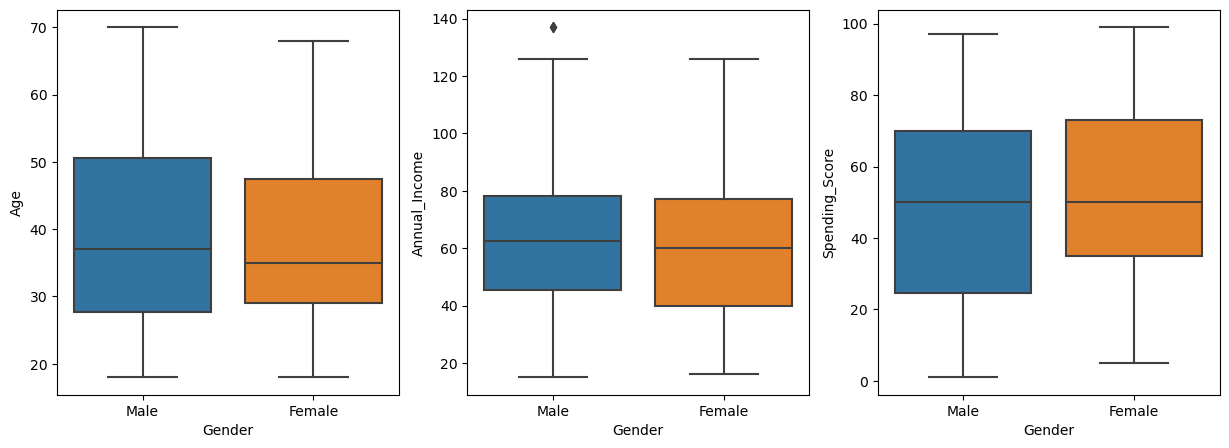

In [85]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Gender', y='Age', data=df)

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Annual_Income', data=df)

plt.subplot(1,3,3)
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.show()

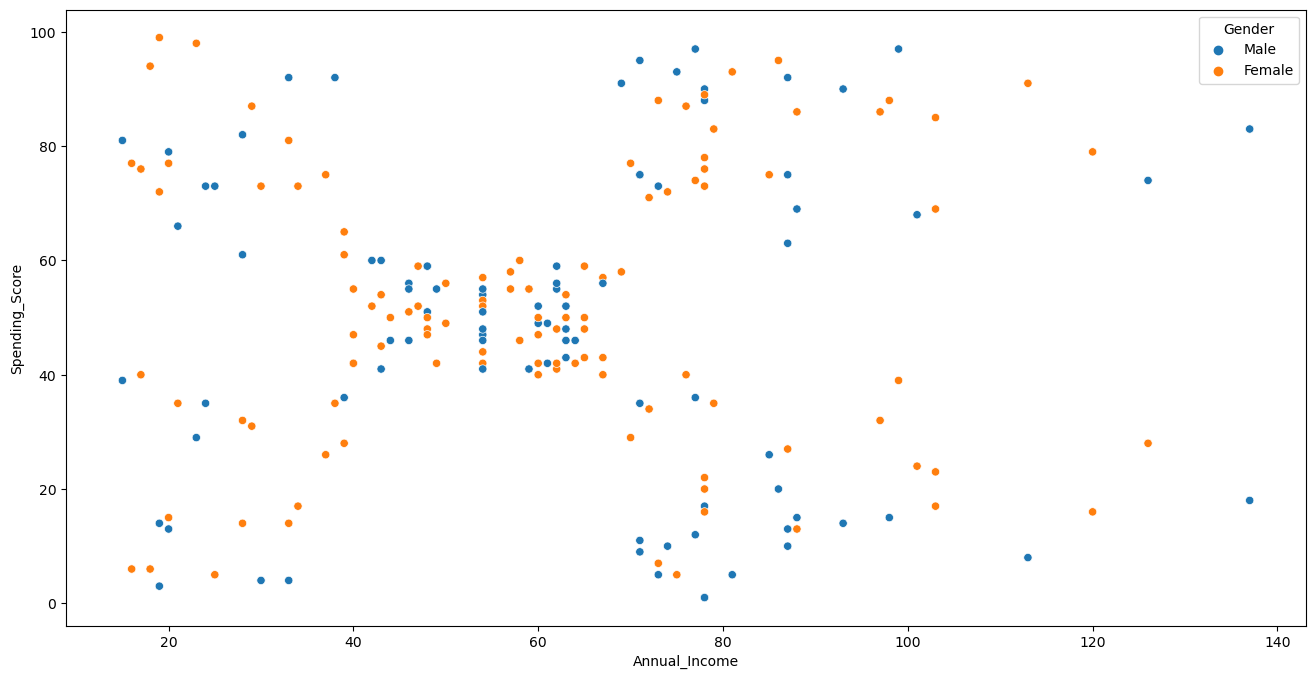

In [82]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

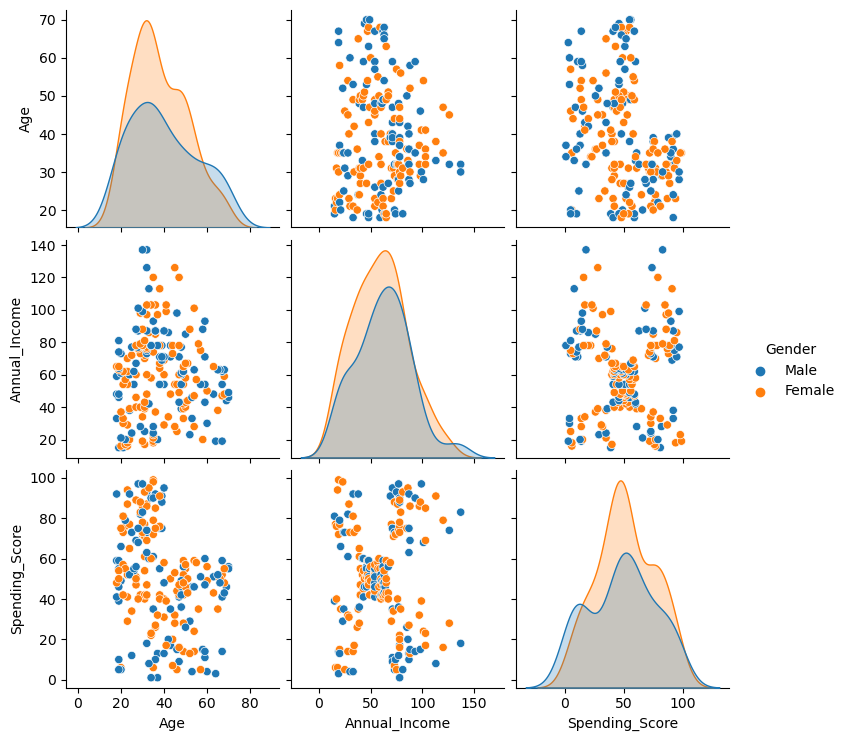

In [83]:
sns.pairplot(df,hue='Gender');

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [109]:
df2 = df[["Age", "Annual_Income","Spending_Score"]]
df2.head()

Age  Annual_Income  Spending_Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40

In [97]:
# function to compute hopkins's statistic for the dataframe
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [211]:
hopkins(df2, 1)

0.6757016877617538

In [111]:
np.mean([hopkins(df2, 1) for _ in range(100)])
# More than 0.5 => prone to clustering.

0.6894491063561621

In [216]:
np.mean([hopkins(StandardScaler().fit_transform(df2)) for _ in range(100)])

0.6920234840447715

In [217]:
np.mean([hopkins(MinMaxScaler().fit_transform(df2)) for _ in range(100)])

0.6845680577062592

In [220]:
#scalling data:
# The K-means algorithm definitely needs scaling. 
# However, the features are in the same range 
# there is no need to scale the data. 
# For these data, scaling may cause worse results in some cases.
# I should try data both with and without scale and continue 
# with whichever one has good results.

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

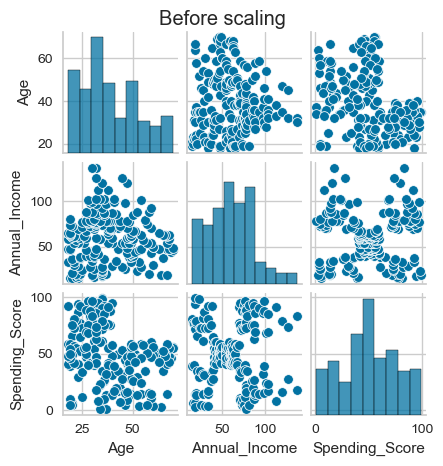

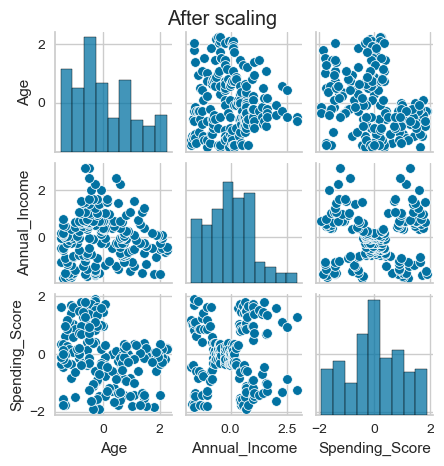

In [221]:
g = sns.pairplot(df2, size=1.5)
_ = g.fig.suptitle("Before scaling", y=1.02)

g = sns.pairplot(pd.DataFrame(df2_scaled, columns=df2.columns), size=1.5)
_ = g.fig.suptitle("After scaling", y=1.02)

In [224]:
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)
df2_scaled.head()

Age  Annual_Income  Spending_Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [421]:
#On unscaled data
df_Age_Sscore = df[["Age", "Spending_Score"]]
df_Age_Sscore.head()

Age  Spending_Score
0   19              39
1   21              81
2   20               6
3   23              77
4   31              40

In [422]:
np.mean([hopkins(df_Age_Sscore, 1) for _ in range(100)])
# More than 0.5 => prone to clustering.

0.6987007402792986

In [403]:
#On scaled data
df_Age_Sscore_scaled = df2_scaled[["Age", "Spending_Score"]]
df_Age_Sscore_scaled.head()

Age  Spending_Score
0 -1.424569       -0.434801
1 -1.281035        1.195704
2 -1.352802       -1.715913
3 -1.137502        1.040418
4 -0.563369       -0.395980

In [226]:
np.mean([hopkins(df_Age_Sscore_scaled, 1) for _ in range(100)])
# More than 0.5 => prone to clustering.

0.6932453385324568

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'Scaled Data')

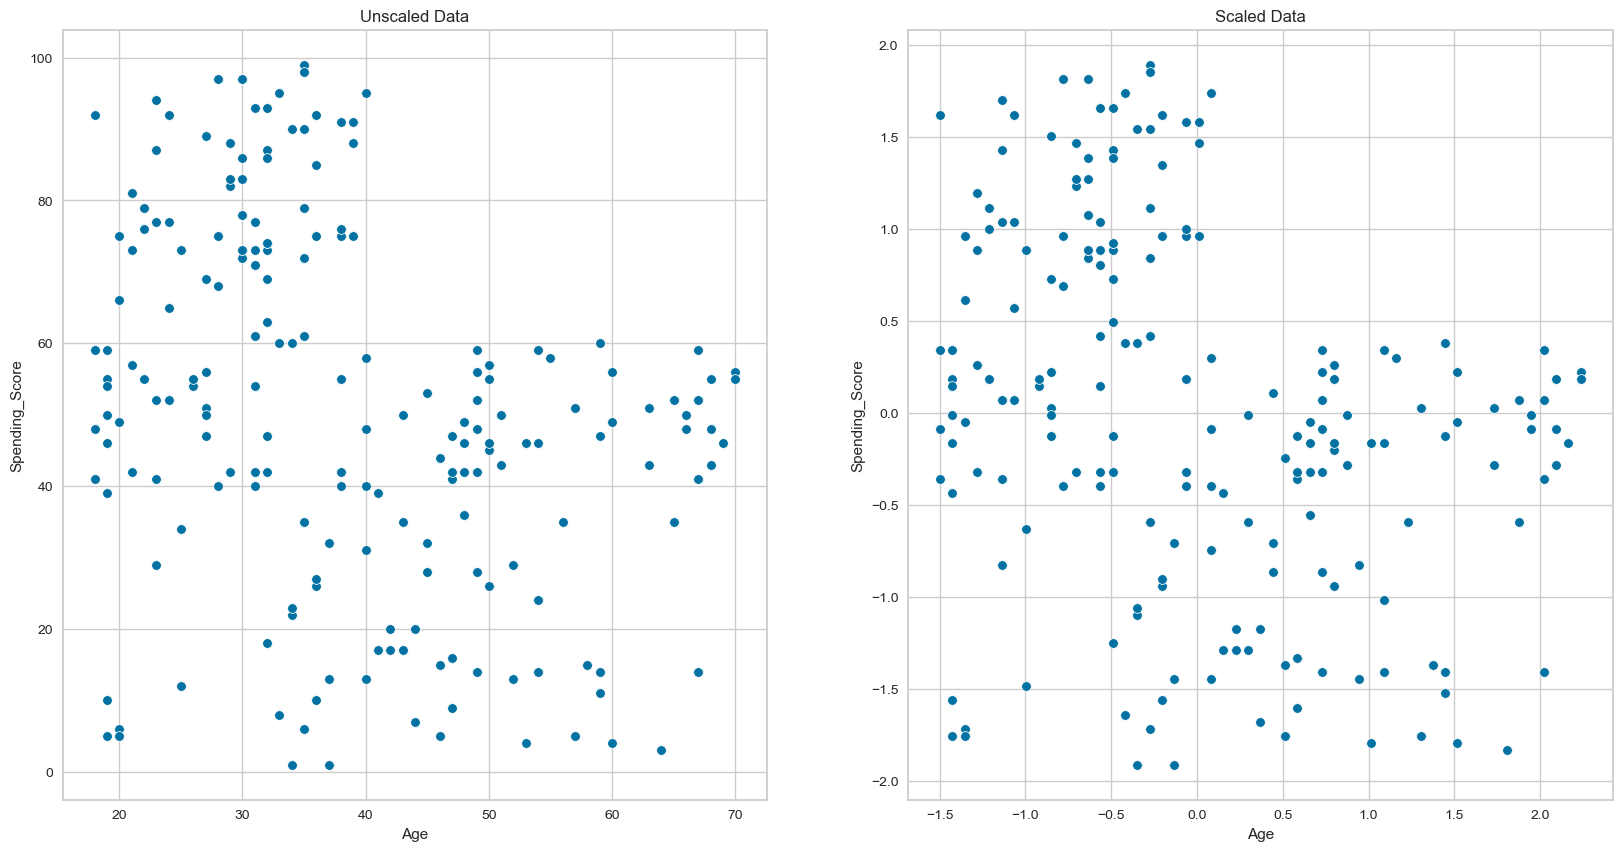

In [285]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.scatterplot(x='Age',y='Spending_Score',data=df_Age_Sscore);
plt.title("Unscaled Data")

plt.subplot(122)
sns.scatterplot(x='Age',y='Spending_Score',data=df_Age_Sscore_scaled);
plt.title("Scaled Data")

In [282]:
#Elbow method using inertia on unscalled data
ssd1 = []

K = range(2,10)

for k in K:
    model_Age_Sscore = KMeans(n_clusters =k,
                   random_state=42)
    model_Age_Sscore.fit(df_Age_Sscore)
    ssd1.append(model_Age_Sscore.inertia_)

In [288]:
#Elbow method using inertia on scalled data
ssd2 = []

for k in K:
    model_Age_Sscore_scaled = KMeans(n_clusters =k,
                   random_state=42)
    model_Age_Sscore_scaled.fit(df_Age_Sscore_scaled)
    ssd2.append(model_Age_Sscore_scaled.inertia_)

Text(0.5, 1.0, 'elbow method on scalled data')

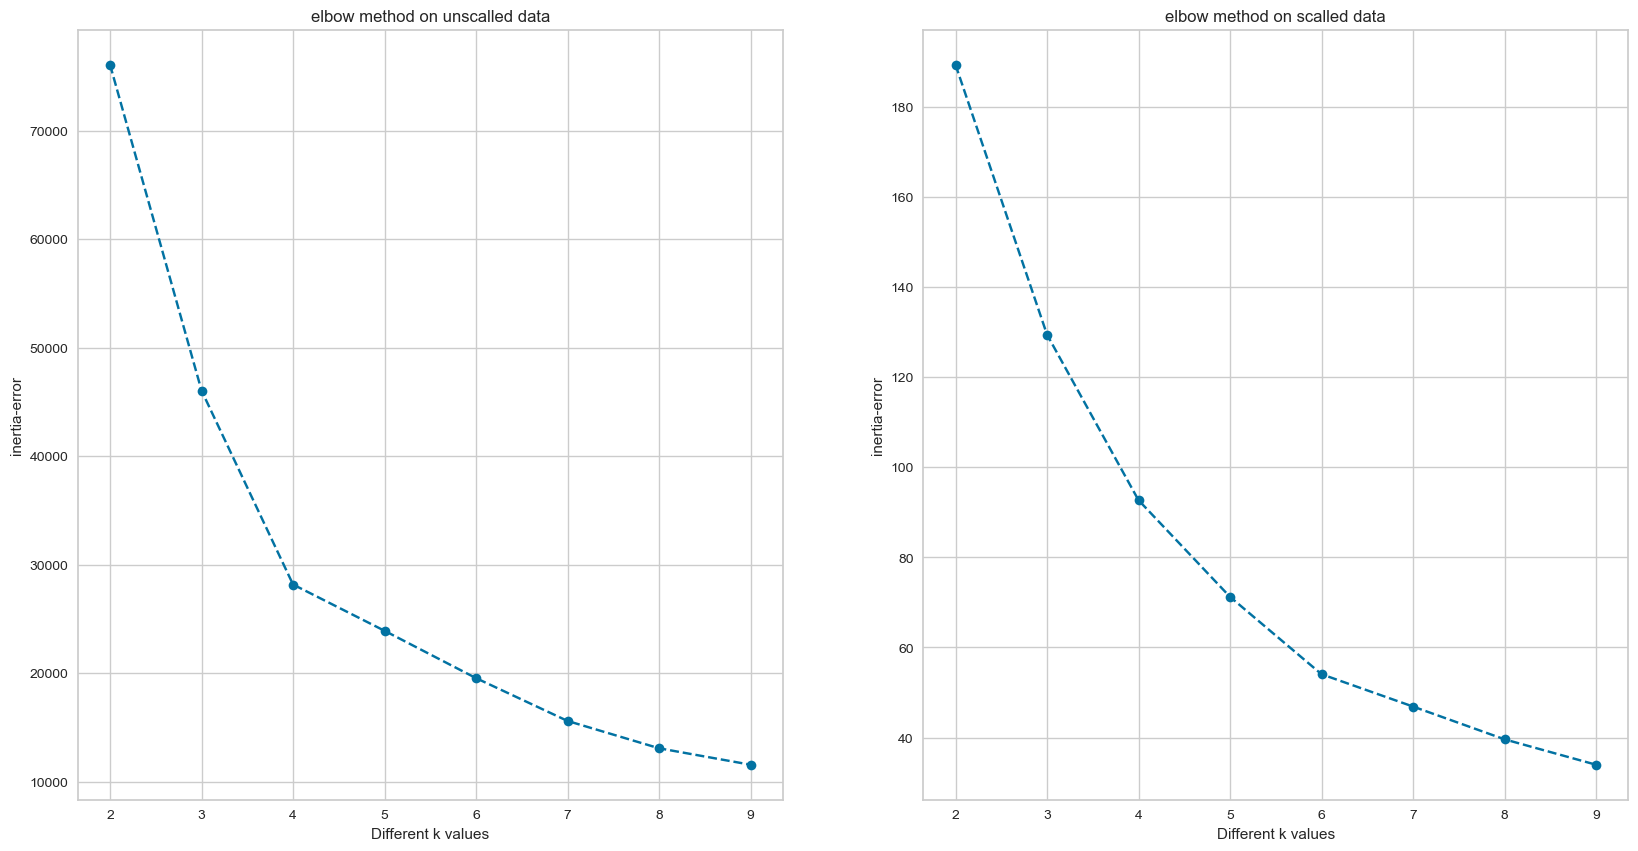

In [283]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(K, ssd1, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on unscalled data")

plt.subplot(122)
plt.plot(K, ssd2, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on scalled data")


In [286]:
ssd1 # sum of squared distance

[76099.3769820972,
 46048.48498721594,
 28165.583566629342,
 23898.46072640809,
 19532.41130521996,
 15583.92559049138,
 13063.774691652952,
 11547.676912502457]

In [287]:
-pd.Series(ssd1).diff()

0             NaN
1    30050.891995
2    17882.901421
3     4267.122840
4     4366.049421
5     3948.485715
6     2520.150899
7     1516.097779
dtype: float64

In [289]:
#Elbow method using distortion on unscalled data
K = range(2, 10)
distortion1 = []
for k in K:
    kmeanModel_Age_Score = KMeans(n_clusters=k, random_state=42)
    kmeanModel_Age_Score.fit(df_Age_Sscore)
    distances = kmeanModel_Age_Score.transform(df_Age_Sscore) # distances from each observation to each cluster centroid
    labels = kmeanModel_Age_Score.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion1.append(sum(result)) # sum the means of all clusters and add it to the distortion list

In [290]:
#Elbow method using distortion on Scaled data
distortion2 = []
for k in K:
    kmeanModel_Age_Score_scaled = KMeans(n_clusters=k, random_state=42)
    kmeanModel_Age_Score_scaled.fit(df_Age_Sscore_scaled)
    distances = kmeanModel_Age_Score_scaled.transform(df_Age_Sscore_scaled) # distances from each observation to each cluster centroid
    labels = kmeanModel_Age_Score_scaled.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion2.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method on scalled data')

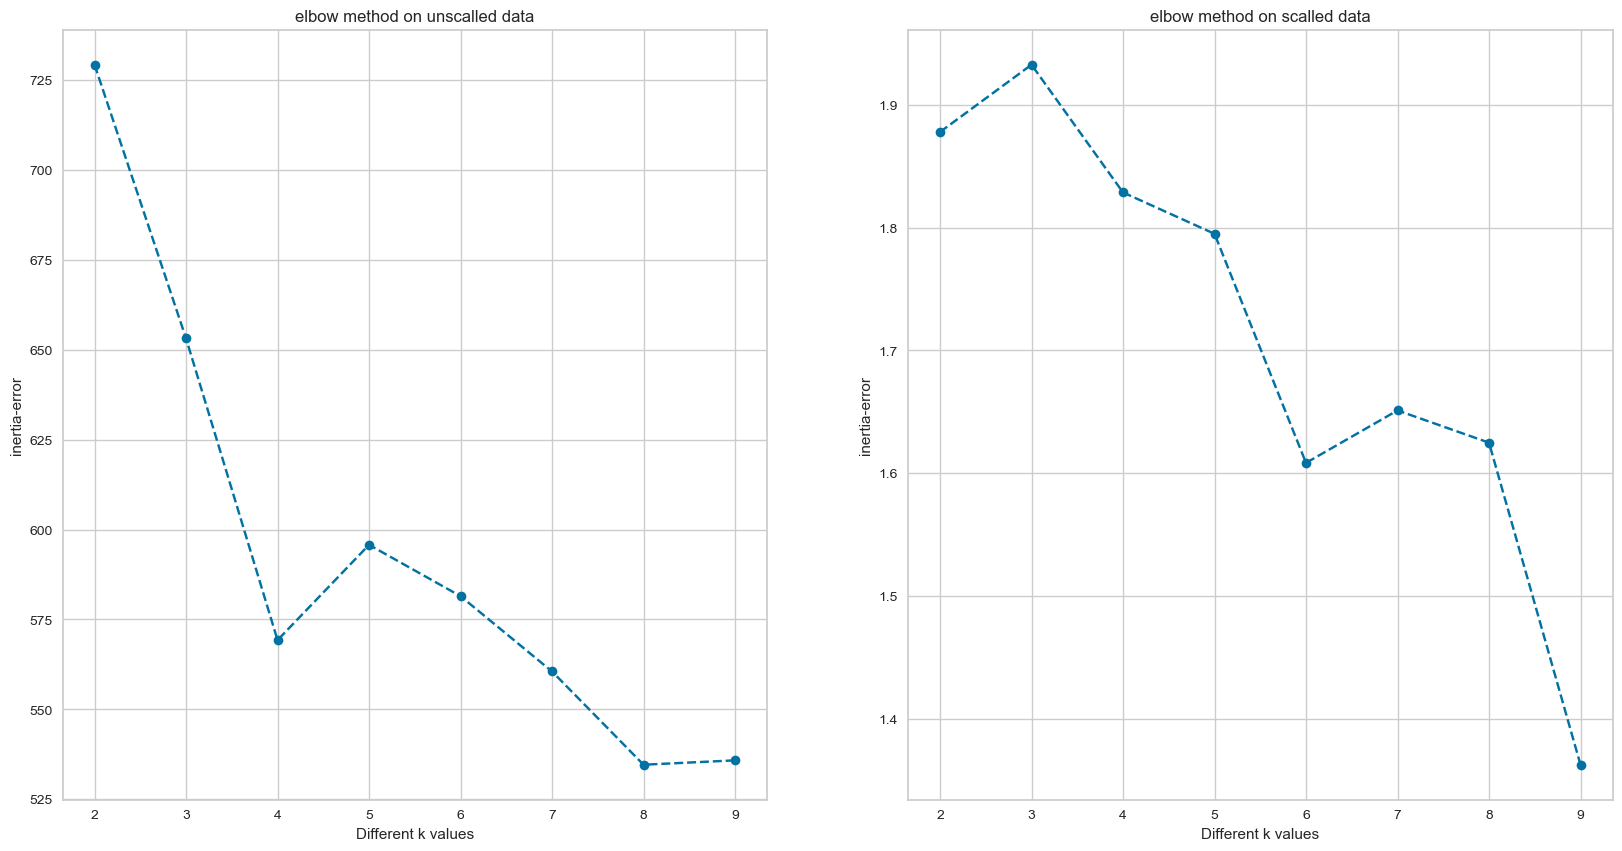

In [291]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(K, distortion1, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on unscalled data")

plt.subplot(122)
plt.plot(K, distortion2, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on scalled data")

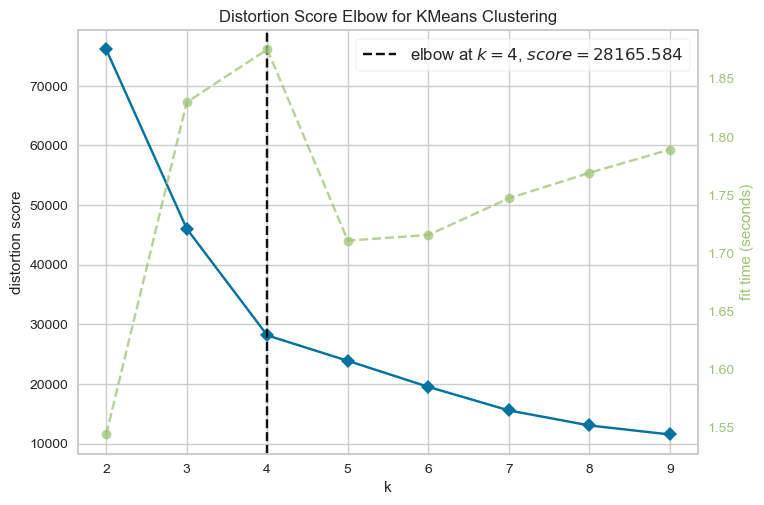

In [296]:
#ElbowVisualizer on Unscaled data
kmeans_Age_Sscore = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans_Age_Sscore, k = (2,10))
visu.fit(df_Age_Sscore)
visu.show();

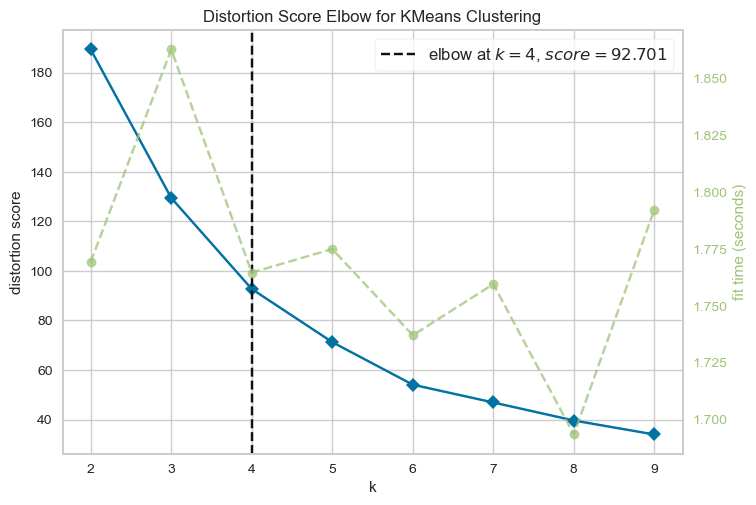

In [297]:
#ElbowVisualizer on scaled data
kmeans_Age_Sscore_scaled = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans_Age_Sscore_scaled, k = (2,10))
visu.fit(df_Age_Sscore_scaled)
visu.show();

In [302]:
#result on unscaled data
silhouette_score(df_Age_Sscore, model_Age_Sscore.labels_)


0.4123213420840813

In [303]:
#result on unscaled data
silhouette_score(df_Age_Sscore, kmeanModel_Age_Score.labels_)

0.4123213420840813

In [304]:
#result on scaled data
silhouette_score(df_Age_Sscore_scaled, model_Age_Sscore_scaled.labels_)

0.4522480938414114

In [305]:
#result on scaled data
silhouette_score(df_Age_Sscore_scaled, kmeanModel_Age_Score_scaled.labels_)

0.4522480938414114

In [306]:
#Silhouette Score on unscaled data
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans_Age_Sscore = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans_Age_Sscore.fit(df_Age_Sscore)
    cluster_labels = kmeans_Age_Sscore.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_Age_Sscore, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4691265279380666
For n_clusters=3, the silhouette score is 0.45224748456174896
For n_clusters=4, the silhouette score is 0.5014655901371473
For n_clusters=5, the silhouette score is 0.4342586631382121
For n_clusters=6, the silhouette score is 0.4375254739882626
For n_clusters=7, the silhouette score is 0.4221940708806092
For n_clusters=8, the silhouette score is 0.43173255418310785


In [307]:
#Silhouette Score on scaled data
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans_Age_Sscore_scaled = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans_Age_Sscore_scaled.fit(df_Age_Sscore_scaled)
    cluster_labels = kmeans_Age_Sscore_scaled.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_Age_Sscore_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5239556361475451
For n_clusters=3, the silhouette score is 0.47156529914379675
For n_clusters=4, the silhouette score is 0.437763979311663
For n_clusters=5, the silhouette score is 0.44118852400503317
For n_clusters=6, the silhouette score is 0.4658591966368483
For n_clusters=7, the silhouette score is 0.41422053655666624
For n_clusters=8, the silhouette score is 0.4148373089104004


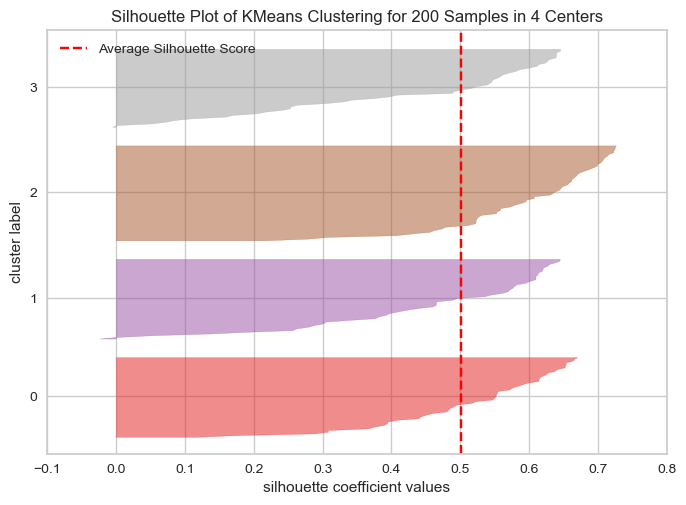

In [309]:
# n_clusters=4 on silhouette score is the highies with unscaled data
model_n_cluster4 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=4!
visualizer1 = SilhouetteVisualizer(model_n_cluster4)

visualizer1.fit(df_Age_Sscore)    # Fit the data to the visualizer
visualizer1.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [611]:
# The number of samples of cluster 2 is higher than other clusters

In [310]:
visualizer1.silhouette_samples_

array([ 0.54246423,  0.60662047,  0.39133482,  0.57267015,  0.4893917 ,
        0.52995369,  0.60011033,  0.64553243,  0.43879176,  0.4778869 ,
        0.30128859,  0.63366431,  0.46443498,  0.58743966,  0.6124574 ,
        0.59552698,  0.25278298,  0.00082   ,  0.054705  ,  0.64359679,
        0.25278298,  0.47269685,  0.62855511,  0.52348601,  0.54433998,
        0.7056195 ,  0.00331647,  0.26184863,  0.13682582,  0.66898081,
        0.49486124,  0.40692548,  0.57547924,  0.59423864,  0.60874026,
        0.60662047,  0.61985752,  0.52218675,  0.30379723,  0.4613876 ,
        0.39431797,  0.66743113,  0.30741226,  0.3039629 ,  0.19011902,
        0.05169513,  0.49045023,  0.62871623,  0.55793793,  0.51606677,
        0.49425454,  0.34189353,  0.54547341,  0.55377214,  0.54597591,
        0.39330354,  0.5711423 ,  0.61393257,  0.63834907,  0.61392257,
        0.58957967,  0.53847734,  0.63974927,  0.51586863,  0.66324114,
        0.39712482,  0.1731288 ,  0.63759919,  0.40782898,  0.52

In [311]:
labels_1 = (model_n_cluster4.labels_ == 1)

In [312]:
visualizer1.silhouette_samples_[labels_1] # silhoutte scores of 1 classes

array([ 0.39133482,  0.60011033,  0.43879176,  0.30128859,  0.46443498,
        0.6124574 ,  0.054705  ,  0.62855511,  0.54433998,  0.00331647,
        0.13682582,  0.49486124,  0.57547924,  0.60874026,  0.61985752,
        0.30379723,  0.19011902,  0.48953549,  0.63733287,  0.39658642,
        0.64415294,  0.33781025,  0.53486567,  0.42164049,  0.40869827,
        0.61817462,  0.56116308,  0.60913402,  0.59493147,  0.57127552,
        0.38102867,  0.27923247,  0.56890897,  0.25641439,  0.64388782,
        0.61209922,  0.58136301,  0.46443498,  0.45959335, -0.02390622,
        0.62616612,  0.28820632,  0.61930604,  0.37606721,  0.57777139,
        0.60913402,  0.26200805,  0.46567512])

In [313]:
mean_silhoutte_score_1 = visualizer1.silhouette_samples_[labels_1].mean()
mean_silhoutte_score_1

0.45503555876183793

In [314]:
## Let's do same thing above for all classes on unscaled data:
for i in range(4):
    label = (model_n_cluster4.labels_== i)
    print(f"mean silhouette score for label {i:<5} : {visualizer1.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer1.silhouette_score_}")

mean silhouette score for label 0     : 0.5122272955114185
mean silhouette score for label 1     : 0.45503555876183793
mean silhouette score for label 2     : 0.5963385694657906
mean silhouette score for label 3     : 0.4228340970800656
mean silhouette score for all labels : 0.5014655901371473


### Why silhouette_score is negative?

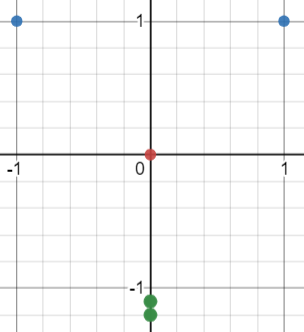

**Answer:**
The negative value of the silhouette score indicates that the data point (the red point) is closer to its neighboring cluster (nearest-cluster distance) than to its own cluster (intra-cluster distance), i.e. the distance to its own cluster (intra-cluster distance) is larger than the distance to the nearest neighboring cluster (nearest-cluster distance). This suggests that the clustering for this specific data point is not optimal, and it might not belong to its current cluster. Negative silhouette scores for individual data points can be indicative of misclassifications or suboptimal clustering results. Its often used as an indicator of the quality of clustering, with a higher silhouette score indicating better-defined clusters and a lower score suggesting issues with the clustering.

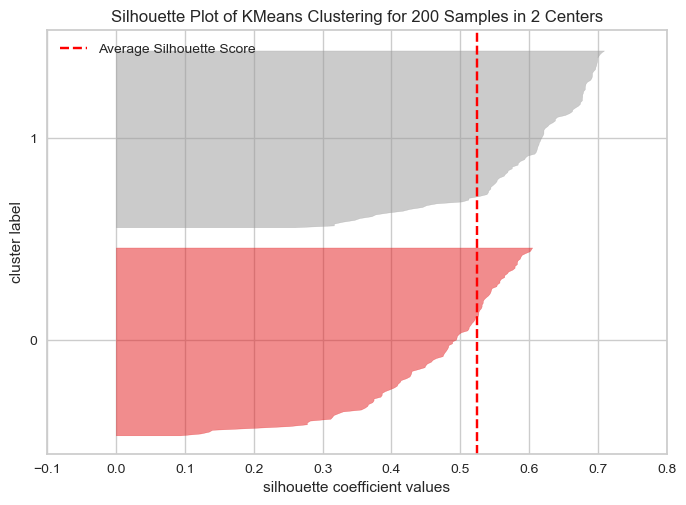

In [315]:
# n_clusters=2 on silhouette score is the highies on scaled data
model_n_cluster2 = KMeans(n_clusters=2,
                random_state=42)          # we decided n_clusters=2 with scaled data!
visualizer2 = SilhouetteVisualizer(model_n_cluster2)

visualizer2.fit(df_Age_Sscore_scaled)    # Fit the data to the visualizer
visualizer2.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [612]:
# The number of samples of cluster 1 is higher than other clusters

In [316]:
## Let's do same thing above for all classes on scaled data:
for i in range(2):
    label = (model_n_cluster2.labels_== i)
    print(f"mean silhouette score for label {i:<3} : {visualizer2.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer2.silhouette_score_}")

mean silhouette score for label 0   : 0.4601270642499816
mean silhouette score for label 1   : 0.5917323671315559
mean silhouette score for all labels : 0.5239556361475451


#### *iii. Apply K Means*

In [317]:
#kmean on unscaled data
Kmean_model_Age_Sscore = KMeans(n_clusters = 4, random_state=42)
Kmean_model_Age_Sscore.fit_predict(df_Age_Sscore)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [275]:
#kmean on scaled data
Kmean_model_Age_Sscore_scaled = KMeans(n_clusters = 2, random_state=42)
Kmean_model_Age_Sscore_scaled.fit_predict(df_Age_Sscore_scaled)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [318]:
Kmean_model_Age_Sscore.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [320]:
clusters_labels = Kmean_model_Age_Sscore.labels_
clusters_labels_scaled = Kmean_model_Age_Sscore_scaled.labels_

In [423]:
df_Age_Sscore["predicted_clusters_Kmeans"] = clusters_labels
df_Age_Sscore_scaled["predicted_clusters_Kmeans"] = clusters_labels_scaled

In [424]:
df_Age_Sscore

Age  Spending_Score  predicted_clusters_Kmeans
0     19              39                          3
1     21              81                          2
2     20               6                          1
3     23              77                          2
4     31              40                          3
..   ...             ...                        ...
195   35              79                          2
196   45              28                          1
197   32              74                          2
198   32              18                          1
199   30              83                          2

[200 rows x 3 columns]

In [425]:
df_Age_Sscore_scaled

Age  Spending_Score  predicted_clusters_Kmeans
0   -1.424569       -0.434801                          1
1   -1.281035        1.195704                          1
2   -1.352802       -1.715913                          0
3   -1.137502        1.040418                          1
4   -0.563369       -0.395980                          1
..        ...             ...                        ...
195 -0.276302        1.118061                          1
196  0.441365       -0.861839                          0
197 -0.491602        0.923953                          1
198 -0.491602       -1.250054                          0
199 -0.635135        1.273347                          1

[200 rows x 3 columns]

#### *iv. Visualizing and Labeling All the Clusters*

Text(0.5, 1.0, 'Clusters on scaled data')

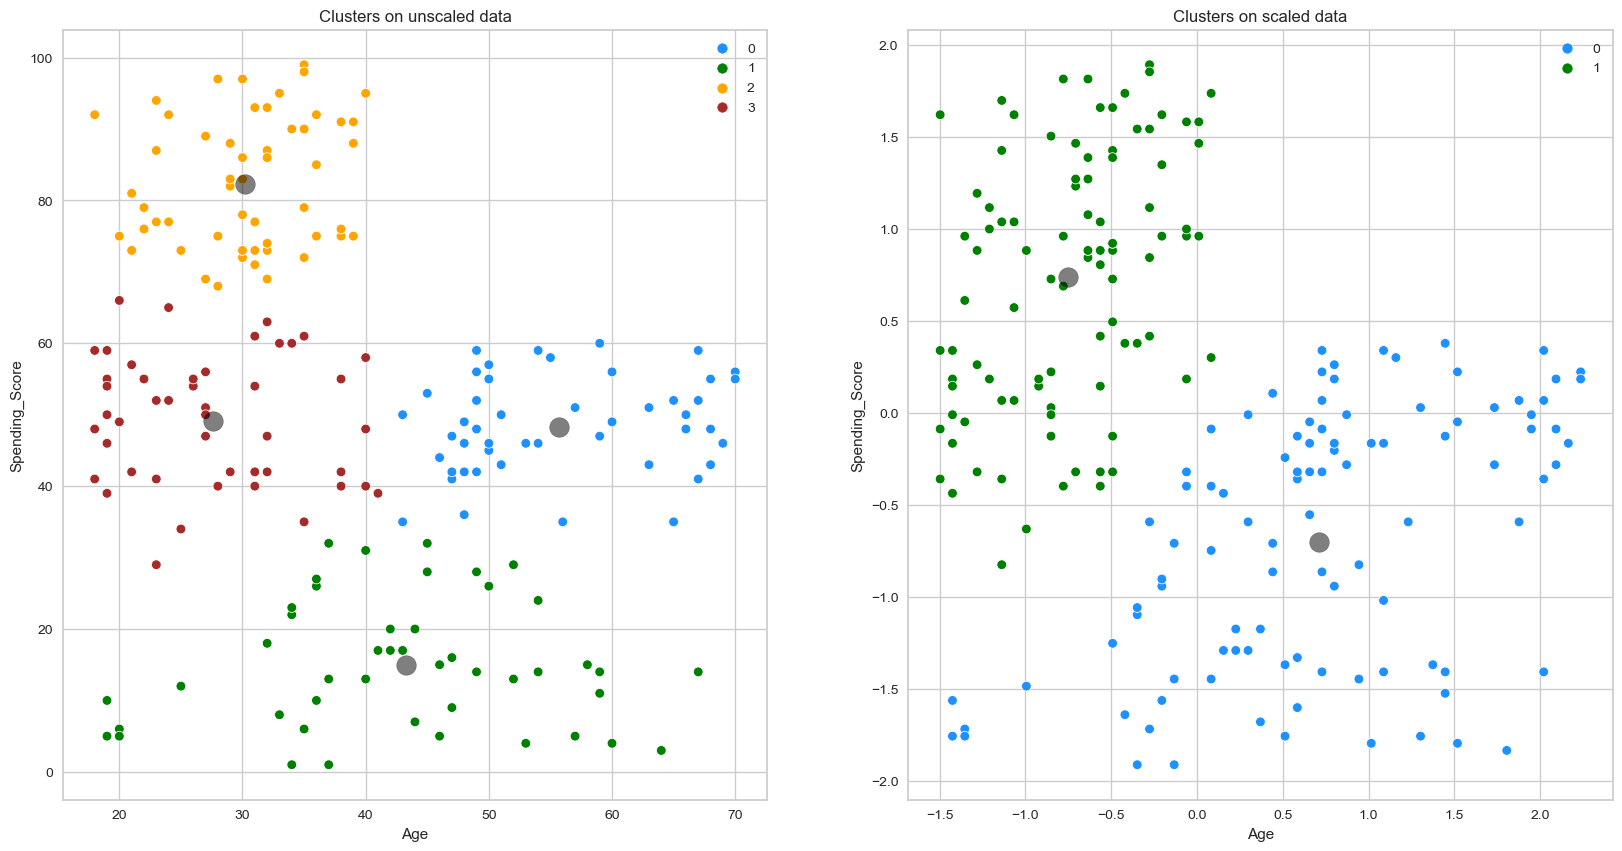

In [326]:
plt.figure(figsize=(20,10))

plt.subplot(121)
#Result on unscaled data
sns.scatterplot(x='Age', y='Spending_Score', hue=clusters_labels, data=df_Age_Sscore,  palette=['dodgerblue','green', 'orange','brown'])
plt.scatter(Kmean_model_Age_Sscore.cluster_centers_[:, 0], Kmean_model_Age_Sscore.cluster_centers_[:, 1], s=200,alpha=0.5, c='black', label = 'Centroids')
plt.title("Clusters on unscaled data")

plt.subplot(122)
#Result on scaled data
sns.scatterplot(x='Age', y='Spending_Score', hue=clusters_labels_scaled, data=df_Age_Sscore_scaled,  palette=['dodgerblue','green'])
plt.scatter(Kmean_model_Age_Sscore_scaled.cluster_centers_[:, 0], Kmean_model_Age_Sscore_scaled.cluster_centers_[:, 1], s=200,alpha=0.5, c='black', label = 'Centroids')
plt.title("Clusters on scaled data")


In [610]:
# People show certain shopping behaviors in certain age periods.
# Therefore, the campaigns we will apply to cluster_0 and cluster_3 will not be the same.

<Figure size 2000x1000 with 0 Axes>

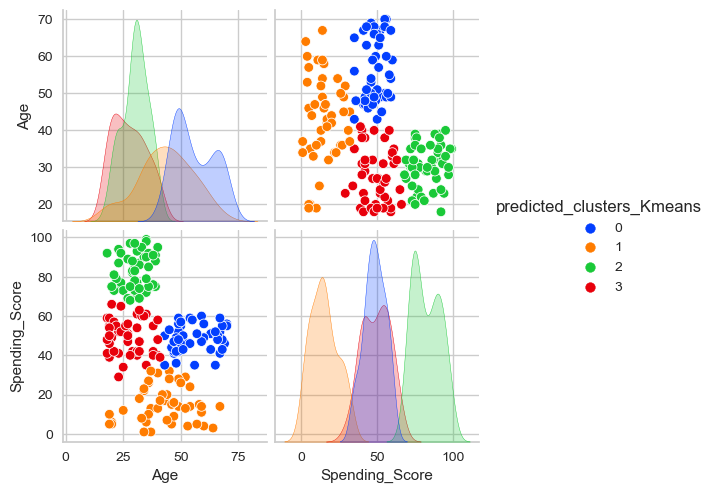

In [463]:
plt.figure(figsize = (20,10))
sns.pairplot(data=df_Age_Sscore, hue="predicted_clusters_Kmeans", palette="bright");

<Figure size 2000x1000 with 0 Axes>

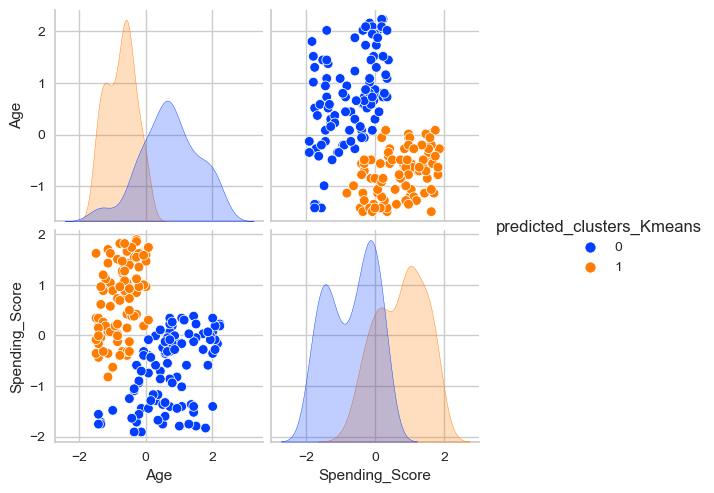

In [464]:
plt.figure(figsize = (20,10))
sns.pairplot(data=df_Age_Sscore_scaled, hue="predicted_clusters_Kmeans", palette="bright");

According to the 4 clusters with unscaled data, we see that the cluster does not make a good distinction between customers based on age and spending score. But we see that the 2 clusters with scaled data make a better distinction between customers. 
However in our problem, its better to set clusters greater than 2.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [426]:
#On inscaled data
df_Sscore_Aincome = df[['Spending_Score','Annual_Income']]
df_Sscore_Aincome

Spending_Score  Annual_Income
0                39             15
1                81             15
2                 6             16
3                77             16
4                40             17
..              ...            ...
195              79            120
196              28            126
197              74            126
198              18            137
199              83            137

[200 rows x 2 columns]

In [427]:
np.mean([hopkins(df_Sscore_Aincome, 1) for _ in range(100)])
# More than 0.5 => prone to clustering.

0.699821126944306

In [428]:
#On scaled data
df_Sscore_Aincome_scaled = df2_scaled[["Spending_Score","Annual_Income"]]
df_Sscore_Aincome_scaled.head()

Spending_Score  Annual_Income
0       -0.434801      -1.738999
1        1.195704      -1.738999
2       -1.715913      -1.700830
3        1.040418      -1.700830
4       -0.395980      -1.662660

In [333]:
np.mean([hopkins(df_Sscore_Aincome_scaled, 1) for _ in range(100)])
# More than 0.5 => prone to clustering.

0.69963368192608

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'Scaled Data')

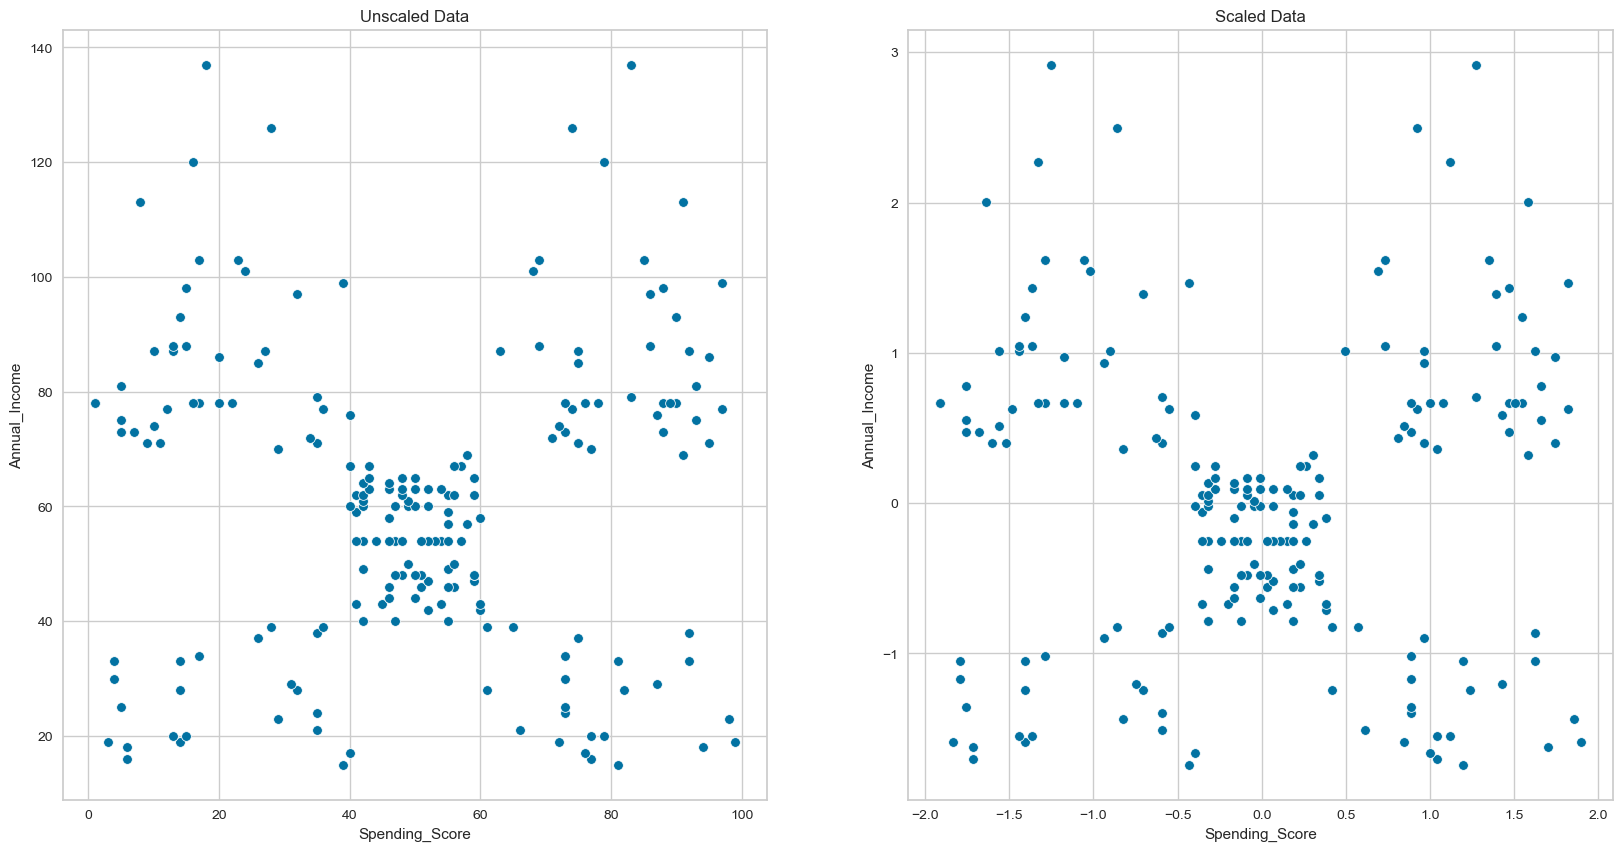

In [334]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.scatterplot(x='Spending_Score',y='Annual_Income',data=df_Sscore_Aincome);
plt.title("Unscaled Data")

plt.subplot(122)
sns.scatterplot(x='Spending_Score',y='Annual_Income',data=df_Sscore_Aincome_scaled);
plt.title("Scaled Data")


In [338]:
#Elbow method using inertia on unscalled data
ssd1 = []

K = range(2,10)

for k in K:
    model_Sscore_Aincome = KMeans(n_clusters =k,
                   random_state=42)
    model_Sscore_Aincome.fit(df_Sscore_Aincome)
    ssd1.append(model_Sscore_Aincome.inertia_)

In [339]:
#Elbow method using inertia on scalled data
ssd2 = []

for k in K:
    model_Sscore_Aincome_scaled = KMeans(n_clusters =k,
                   random_state=42)
    model_Sscore_Aincome_scaled.fit(df_Sscore_Aincome_scaled)
    ssd2.append(model_Sscore_Aincome_scaled.inertia_)

Text(0.5, 1.0, 'elbow method on scalled data')

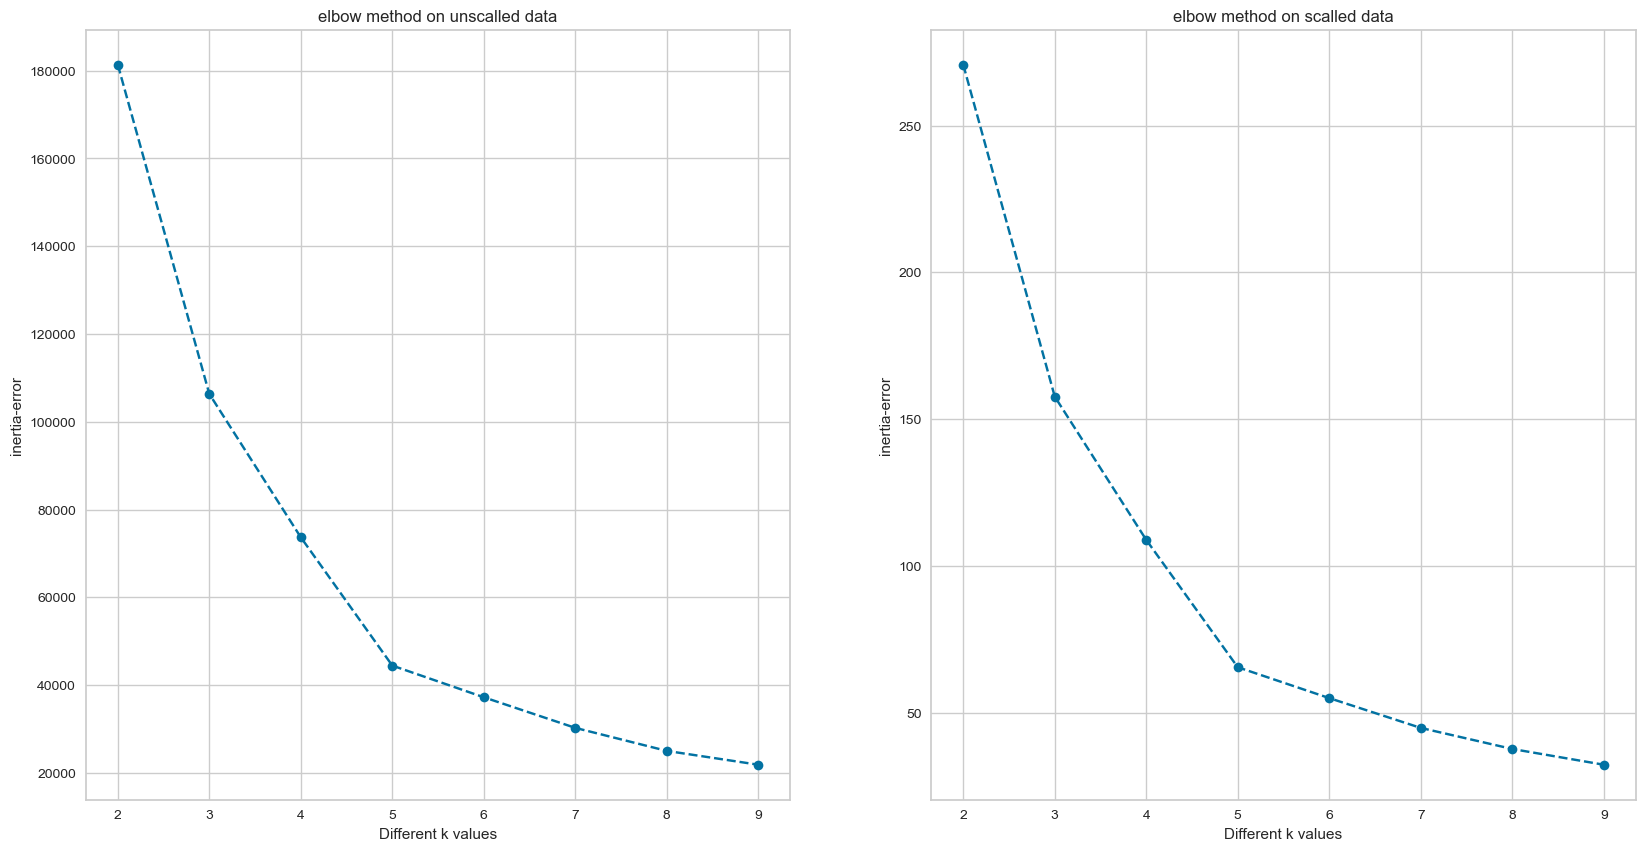

In [340]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(K, ssd1, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on unscalled data")

plt.subplot(122)
plt.plot(K, ssd2, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on scalled data")

In [341]:
#Elbow method using distortion on unscaled data

K = range(2, 10)
distortion1 = []
for k in K:
    kmeanModel_Score_Aincome = KMeans(n_clusters=k, random_state=42)
    kmeanModel_Score_Aincome.fit(df_Sscore_Aincome)
    distances = kmeanModel_Score_Aincome.transform(df_Sscore_Aincome) # distances from each observation to each cluster centroid
    labels = kmeanModel_Score_Aincome.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion1.append(sum(result)) # sum the means of all clusters and add it to the distortion list

In [342]:
#Elbow method using distortion on Scaled data
distortion2 = []
for k in K:
    kmeanModel_Score_Aincome_scaled = KMeans(n_clusters=k, random_state=42)
    kmeanModel_Score_Aincome_scaled.fit(df_Sscore_Aincome_scaled)
    distances = kmeanModel_Score_Aincome_scaled.transform(df_Sscore_Aincome_scaled) # distances from each observation to each cluster centroid
    labels = kmeanModel_Score_Aincome_scaled.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion2.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method on scalled data')

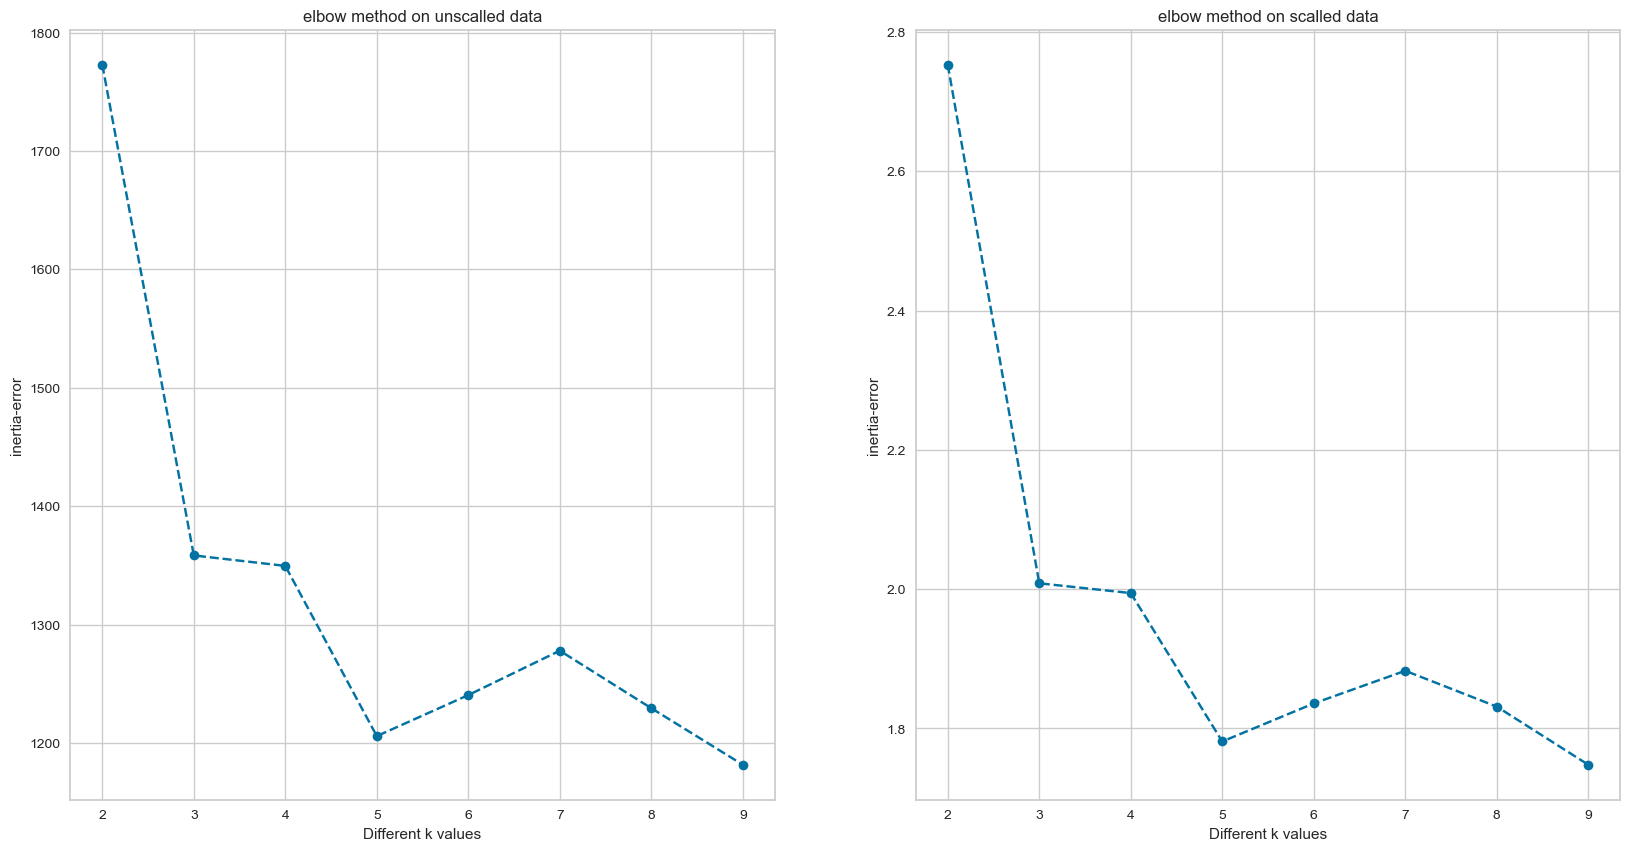

In [343]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(K, distortion1, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on unscalled data")

plt.subplot(122)
plt.plot(K, distortion2, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method on scalled data")

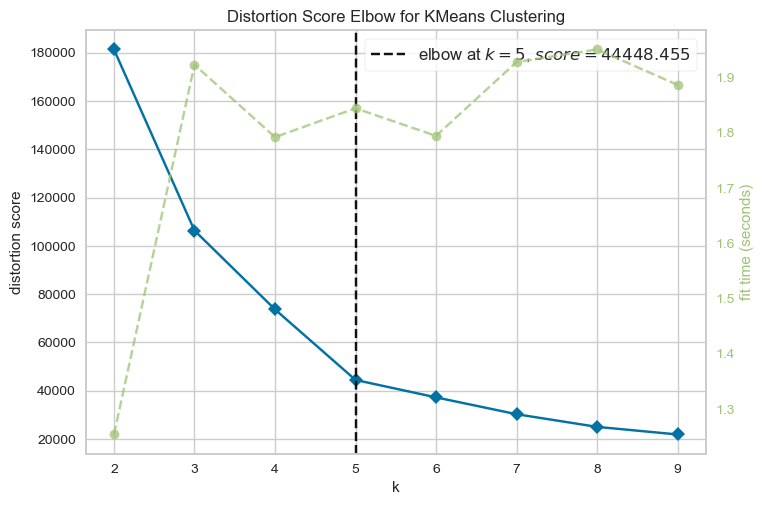

In [344]:
#ElbowVisualizer on Unscaled data
kmeans_Sscore_Aincome = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans_Sscore_Aincome, k = (2,10))
visu.fit(df_Sscore_Aincome)
visu.show();

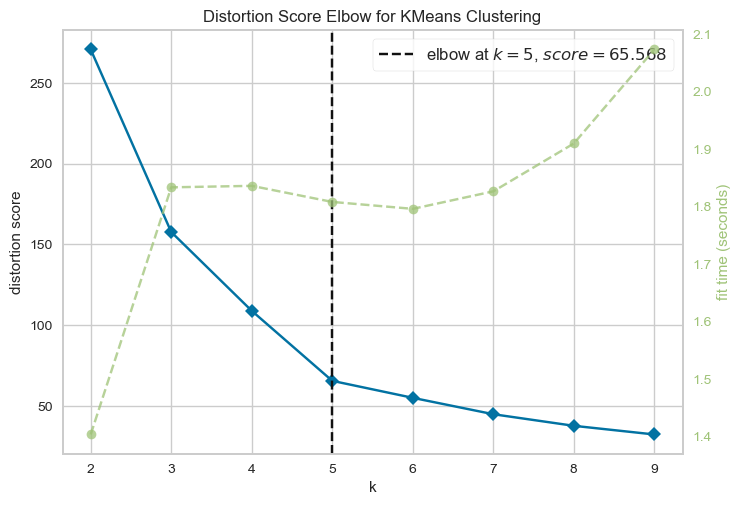

In [345]:
#ElbowVisualizer on scaled data
kmeans_Sscore_Aincome_scaled = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans_Sscore_Aincome_scaled, k = (2,10))
visu.fit(df_Sscore_Aincome_scaled)
visu.show();

In [347]:
#result on unscaled data
silhouette_score(df_Sscore_Aincome, model_Sscore_Aincome.labels_)

0.4553729779390266

In [349]:
#result on unscaled data
silhouette_score(df_Sscore_Aincome, kmeanModel_Score_Aincome.labels_)

0.4553729779390266

In [350]:
#result on scaled data
silhouette_score(df_Sscore_Aincome_scaled, model_Sscore_Aincome_scaled.labels_)

0.45532159949822093

In [351]:
#result on scaled data
silhouette_score(df_Sscore_Aincome_scaled, kmeanModel_Score_Aincome_scaled.labels_)

0.45532159949822093

In [352]:
#Silhouette Score on unscaled data
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans_Sscore_Aincome = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans_Sscore_Aincome.fit(df_Sscore_Aincome)
    cluster_labels = kmeans_Sscore_Aincome.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_Sscore_Aincome, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


In [353]:
#Silhouette Score on scaled data
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans_Sscore_Aincome_scaled = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans_Sscore_Aincome_scaled.fit(df_Sscore_Aincome_scaled)
    cluster_labels = kmeans_Sscore_Aincome_scaled.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_Sscore_Aincome_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45584381231187066


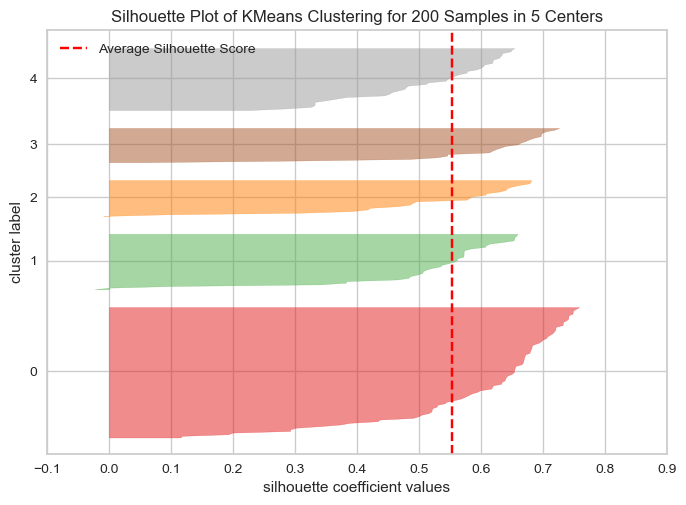

In [354]:
# n_clusters=5 on silhouette score is the highies on unscaled data
model_n_cluster5 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=5!
visualizer1 = SilhouetteVisualizer(model_n_cluster5)

visualizer1.fit(df_Sscore_Aincome)    # Fit the data to the visualizer
visualizer1.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [613]:
# The number of samples of cluster 0 is higher than other clusters

In [355]:
## Let's do same thing above for all classes:
for i in range(5):
    label = (model_n_cluster5.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer1.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer1.silhouette_score_}")

mean silhouette score for label 0      : 0.5966512190217801
mean silhouette score for label 1      : 0.5039873487056818
mean silhouette score for label 2      : 0.5122676140736505
mean silhouette score for label 3      : 0.5990128687006722
mean silhouette score for label 4      : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


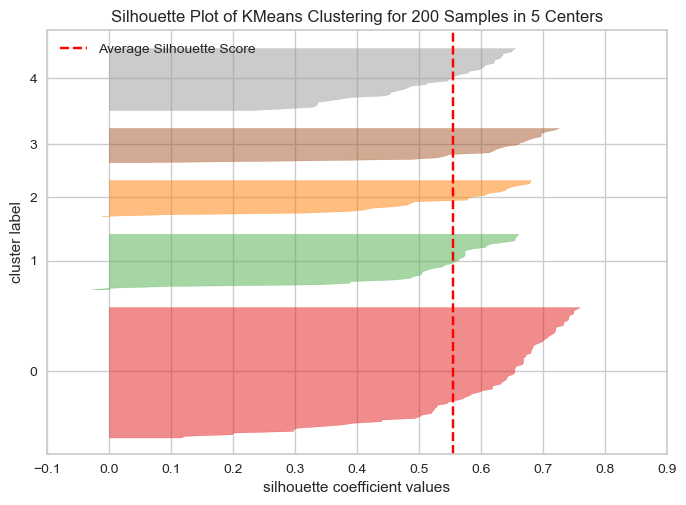

In [356]:
# n_clusters=5 on silhouette score is the highies on scaled data
model_n_cluster5_scaled = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=5!
visualizer2 = SilhouetteVisualizer(model_n_cluster5_scaled)

visualizer2.fit(df_Sscore_Aincome_scaled)    # Fit the data to the visualizer
visualizer2.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [614]:
# The number of samples of cluster 0 is higher than other clusters

In [357]:
## Let's do same thing above for all classes:
for i in range(5):
    label = (model_n_cluster5_scaled.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer2.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer2.silhouette_score_}")

mean silhouette score for label 0      : 0.5978670176450109
mean silhouette score for label 1      : 0.505215392212549
mean silhouette score for label 2      : 0.5105060797073506
mean silhouette score for label 3      : 0.5982119461245774
mean silhouette score for label 4      : 0.5107528927571013
mean silhouette score for all labels : 0.5546571631111091


#### *iii. Apply K Means*

In [363]:
#kmean on unscaled data
Kmean_model_Score_Aincome = KMeans(n_clusters = 5, random_state=42)
Kmean_model_Score_Aincome.fit_predict(df_Sscore_Aincome)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [364]:
#kmean on scaled data
Kmean_model_Score_Aincome_scaled = KMeans(n_clusters = 5, random_state=42)
Kmean_model_Score_Aincome_scaled.fit_predict(df_Sscore_Aincome_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [367]:
clusters_labels2 = Kmean_model_Score_Aincome.labels_
clusters_labels2_scaled= Kmean_model_Score_Aincome_scaled.labels_

In [429]:
df_Sscore_Aincome["predicted_clusters_Kmeans"] = clusters_labels2
df_Sscore_Aincome_scaled["predicted_clusters_Kmeans"] = clusters_labels2_scaled

In [430]:
df_Sscore_Aincome

Spending_Score  Annual_Income  predicted_clusters_Kmeans
0                39             15                          2
1                81             15                          3
2                 6             16                          2
3                77             16                          3
4                40             17                          2
..              ...            ...                        ...
195              79            120                          4
196              28            126                          1
197              74            126                          4
198              18            137                          1
199              83            137                          4

[200 rows x 3 columns]

In [431]:
df_Sscore_Aincome_scaled

Spending_Score  Annual_Income  predicted_clusters_Kmeans
0         -0.434801      -1.738999                          2
1          1.195704      -1.738999                          3
2         -1.715913      -1.700830                          2
3          1.040418      -1.700830                          3
4         -0.395980      -1.662660                          2
..              ...            ...                        ...
195        1.118061       2.268791                          4
196       -0.861839       2.497807                          1
197        0.923953       2.497807                          4
198       -1.250054       2.917671                          1
199        1.273347       2.917671                          4

[200 rows x 3 columns]

#### *iv. Visualizing and Labeling All the Clusters*

Text(0.5, 1.0, 'Clusters on scaled data')

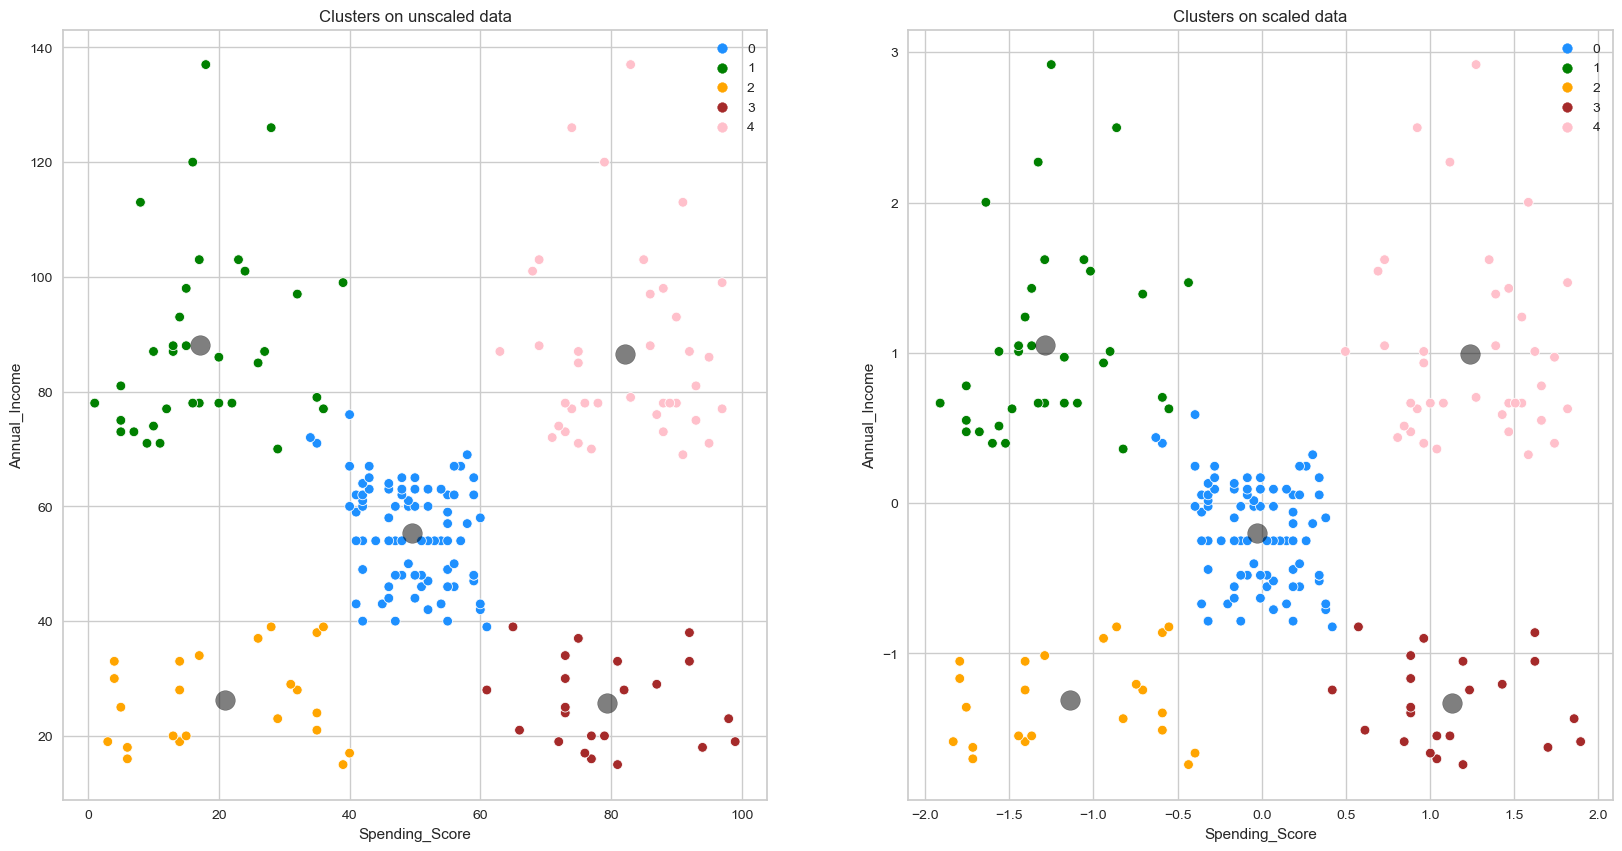

In [371]:
plt.figure(figsize=(20,10))

plt.subplot(121)
#Result on unscaled data
sns.scatterplot(x='Spending_Score', y='Annual_Income', hue=clusters_labels2, data=df_Sscore_Aincome, palette=['dodgerblue','green', 'orange','brown', 'pink'])
plt.scatter(Kmean_model_Score_Aincome.cluster_centers_[:, 0], Kmean_model_Score_Aincome.cluster_centers_[:, 1], s=200,alpha=0.5, c='black', label = 'Centroids')
plt.title("Clusters on unscaled data")

plt.subplot(122)
#Result on scaled data
sns.scatterplot(x='Spending_Score', y='Annual_Income', hue=clusters_labels2_scaled, data=df_Sscore_Aincome_scaled, palette=['dodgerblue','green', 'orange','brown',  'pink'])
plt.scatter(Kmean_model_Score_Aincome_scaled.cluster_centers_[:, 0], Kmean_model_Score_Aincome_scaled.cluster_centers_[:, 1], s=200,alpha=0.5, c='black', label = 'Centroids')
plt.title("Clusters on scaled data")

<Figure size 2000x1000 with 0 Axes>

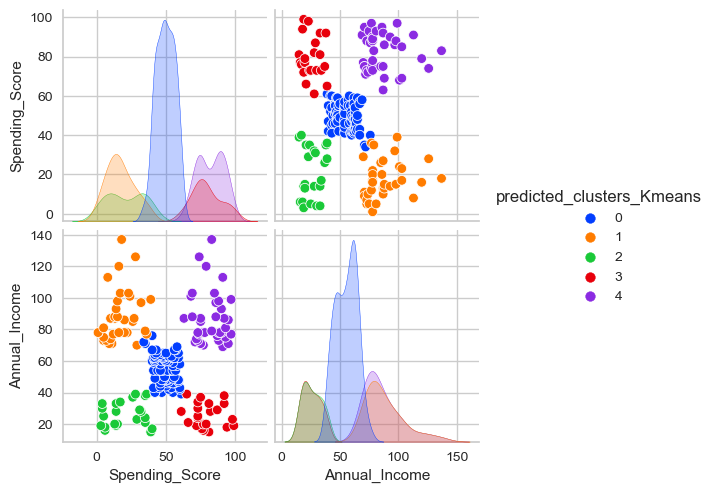

In [465]:
plt.figure(figsize = (20,10))
sns.pairplot(data=df_Sscore_Aincome, hue="predicted_clusters_Kmeans", palette="bright");

<Figure size 2000x1000 with 0 Axes>

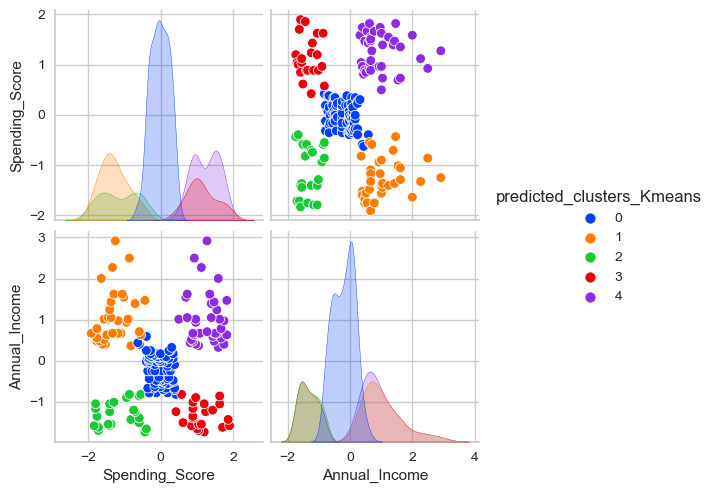

In [467]:
plt.figure(figsize = (20,10))
sns.pairplot(data=df_Sscore_Aincome_scaled, hue="predicted_clusters_Kmeans", palette="bright");

According to the 5 clusters on either scaled data or unscaed data, we see that the cluster make a good distinction between customers based on annual income and spending score.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [432]:
x1 = df_Age_Sscore.copy()
x1.head(2)

Age  Spending_Score  predicted_clusters_Kmeans
0   19              39                          3
1   21              81                          2

In [436]:
x1_scaled= df_Age_Sscore_scaled.copy()
x1_scaled.head(2)

Age  Spending_Score  predicted_clusters_Kmeans
0 -1.424569       -0.434801                          1
1 -1.281035        1.195704                          1

In [433]:
#On unscaled data
hc_Age_Sscore_ward = linkage(y=x1, method="ward")
hc_Age_Sscore_complete = linkage(x1, "complete")
hc_Age_Sscore_average = linkage(x1, "average")
hc_Age_Sscore_single = linkage(x1, "single")

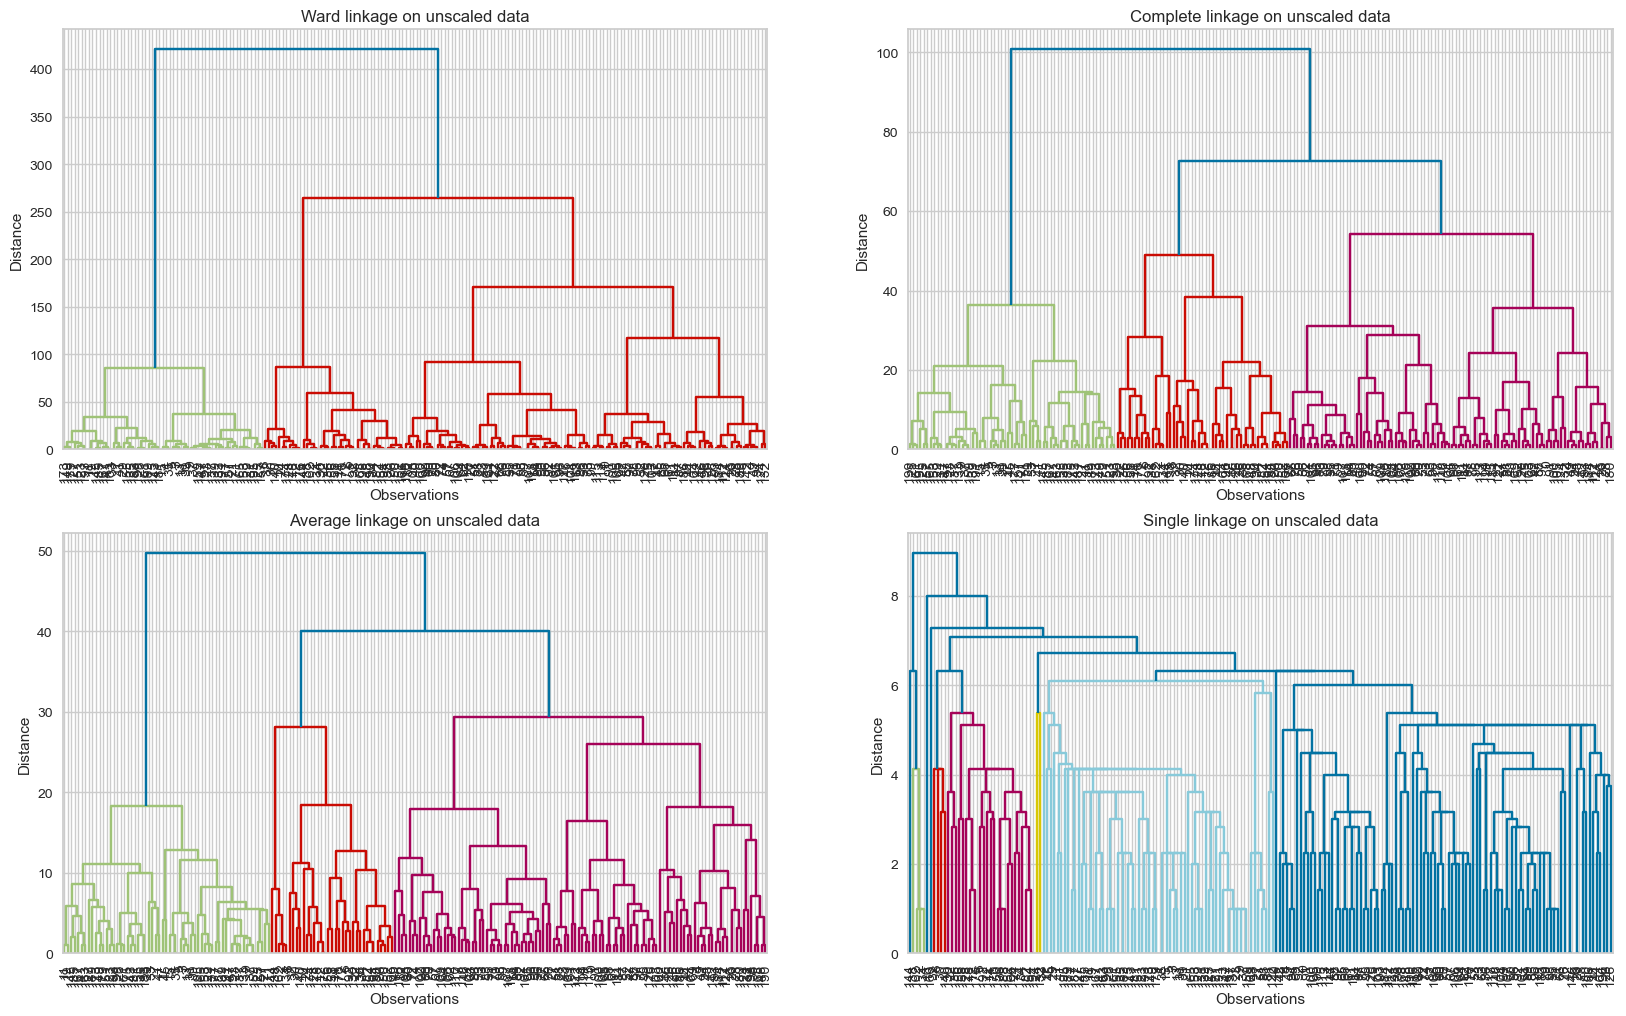

In [434]:
#On unscaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_ward, leaf_font_size = 10);

plt.subplot(222)
plt.title("Complete linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_complete, leaf_font_size = 10);

plt.subplot(223)
plt.title("Average linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_average, leaf_font_size = 10);

plt.subplot(224)
plt.title("Single linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_single, leaf_font_size = 10);

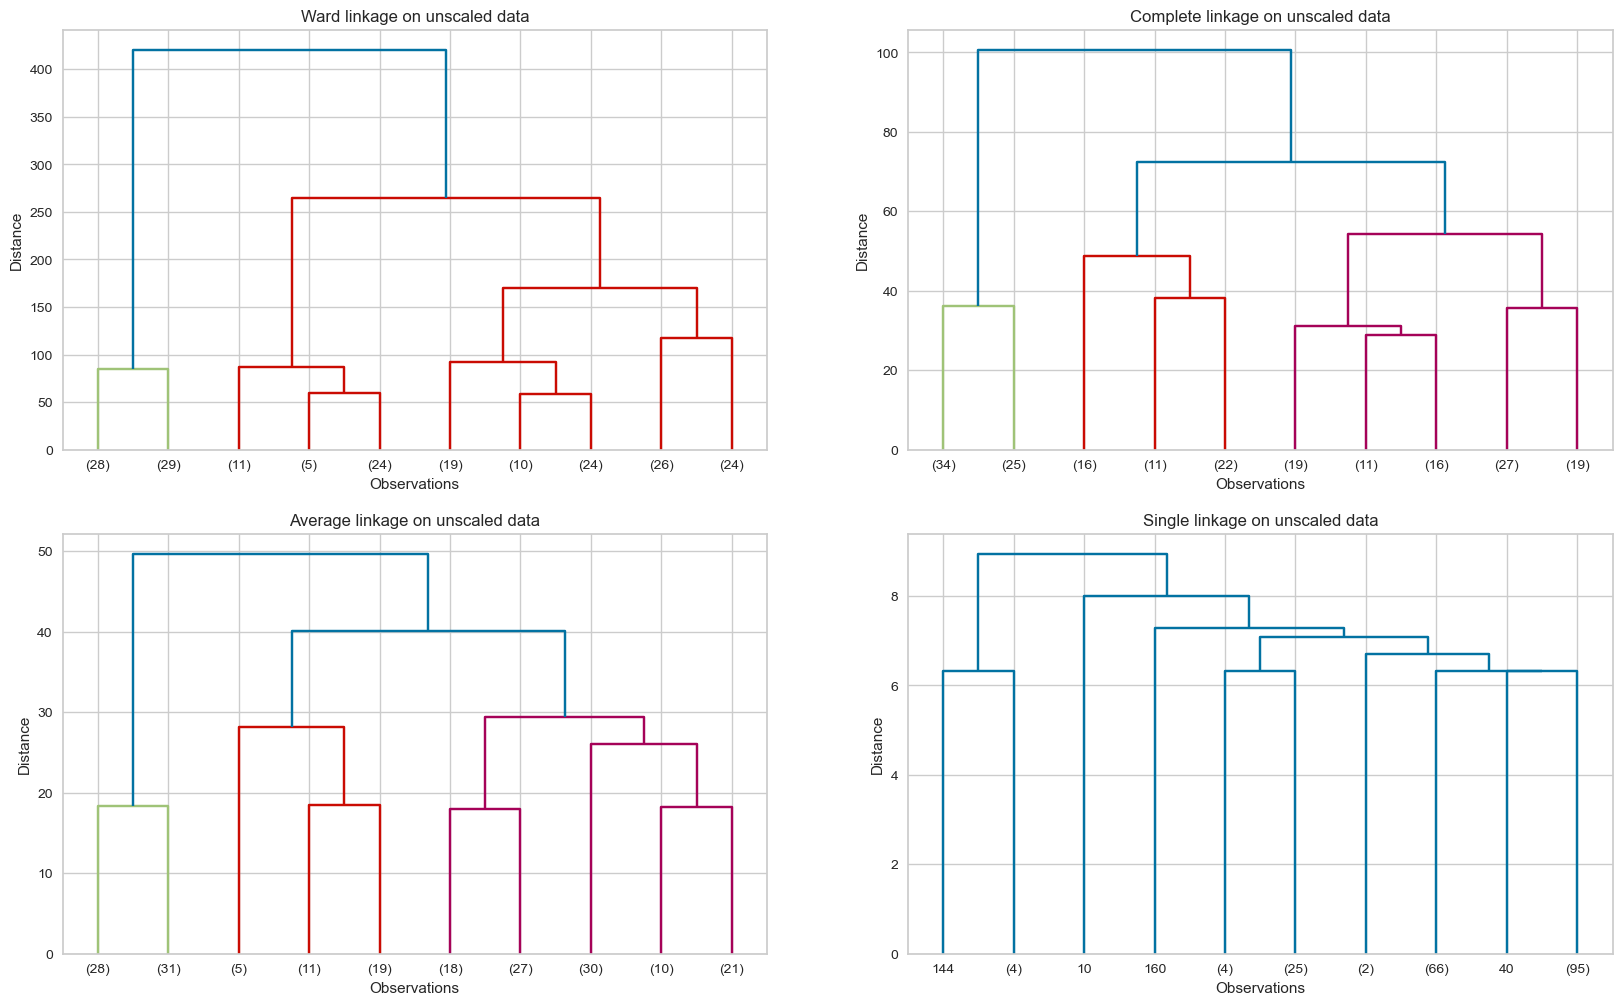

In [437]:
#On unscaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_ward, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(222)
plt.title("Complete linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_complete, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(223)
plt.title("Average linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_average, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(224)
plt.title("Single linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [460]:
#On scaled data
hc_Age_Sscore_scaled_ward = linkage(y=x1_scaled, method="ward")
hc_Age_Sscore_scaled_complete = linkage(x1_scaled, "complete")
hc_Age_Sscore_scaled_average = linkage(x1_scaled, "average")
hc_Age_Sscore_scaled_single = linkage(x1_scaled, "single")

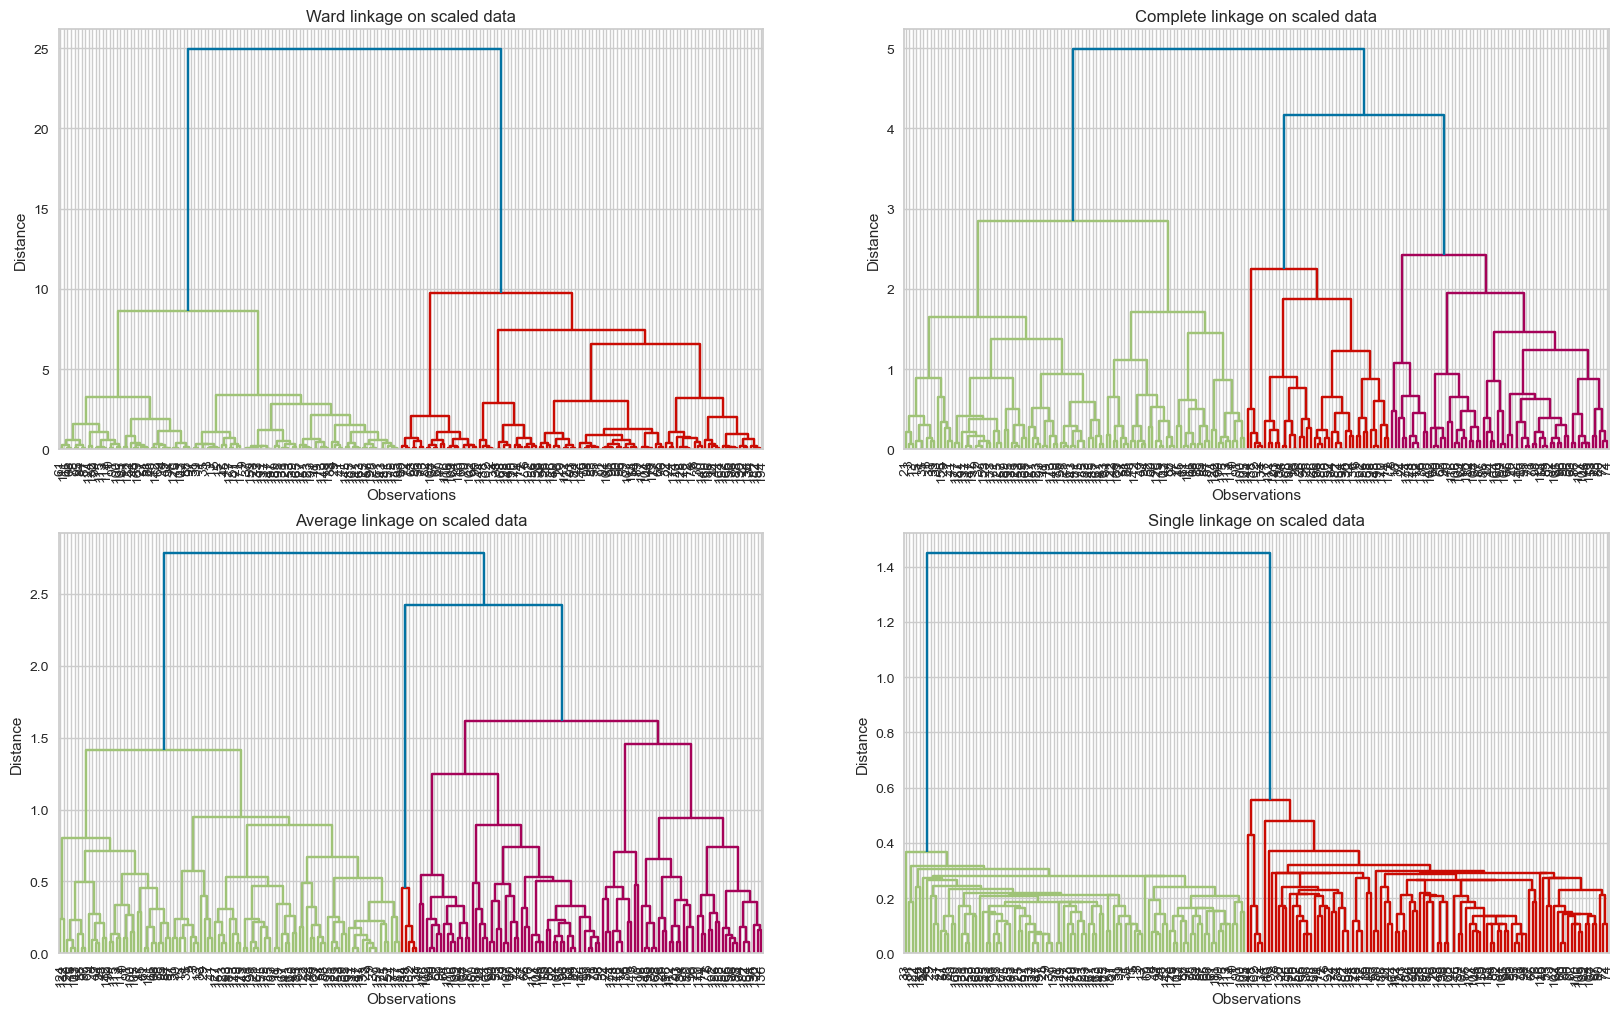

In [461]:
#On scaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_ward, leaf_font_size = 10);

plt.subplot(222)
plt.title("Complete linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_complete, leaf_font_size = 10);

plt.subplot(223)
plt.title("Average linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_average, leaf_font_size = 10);

plt.subplot(224)
plt.title("Single linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_single, leaf_font_size = 10);

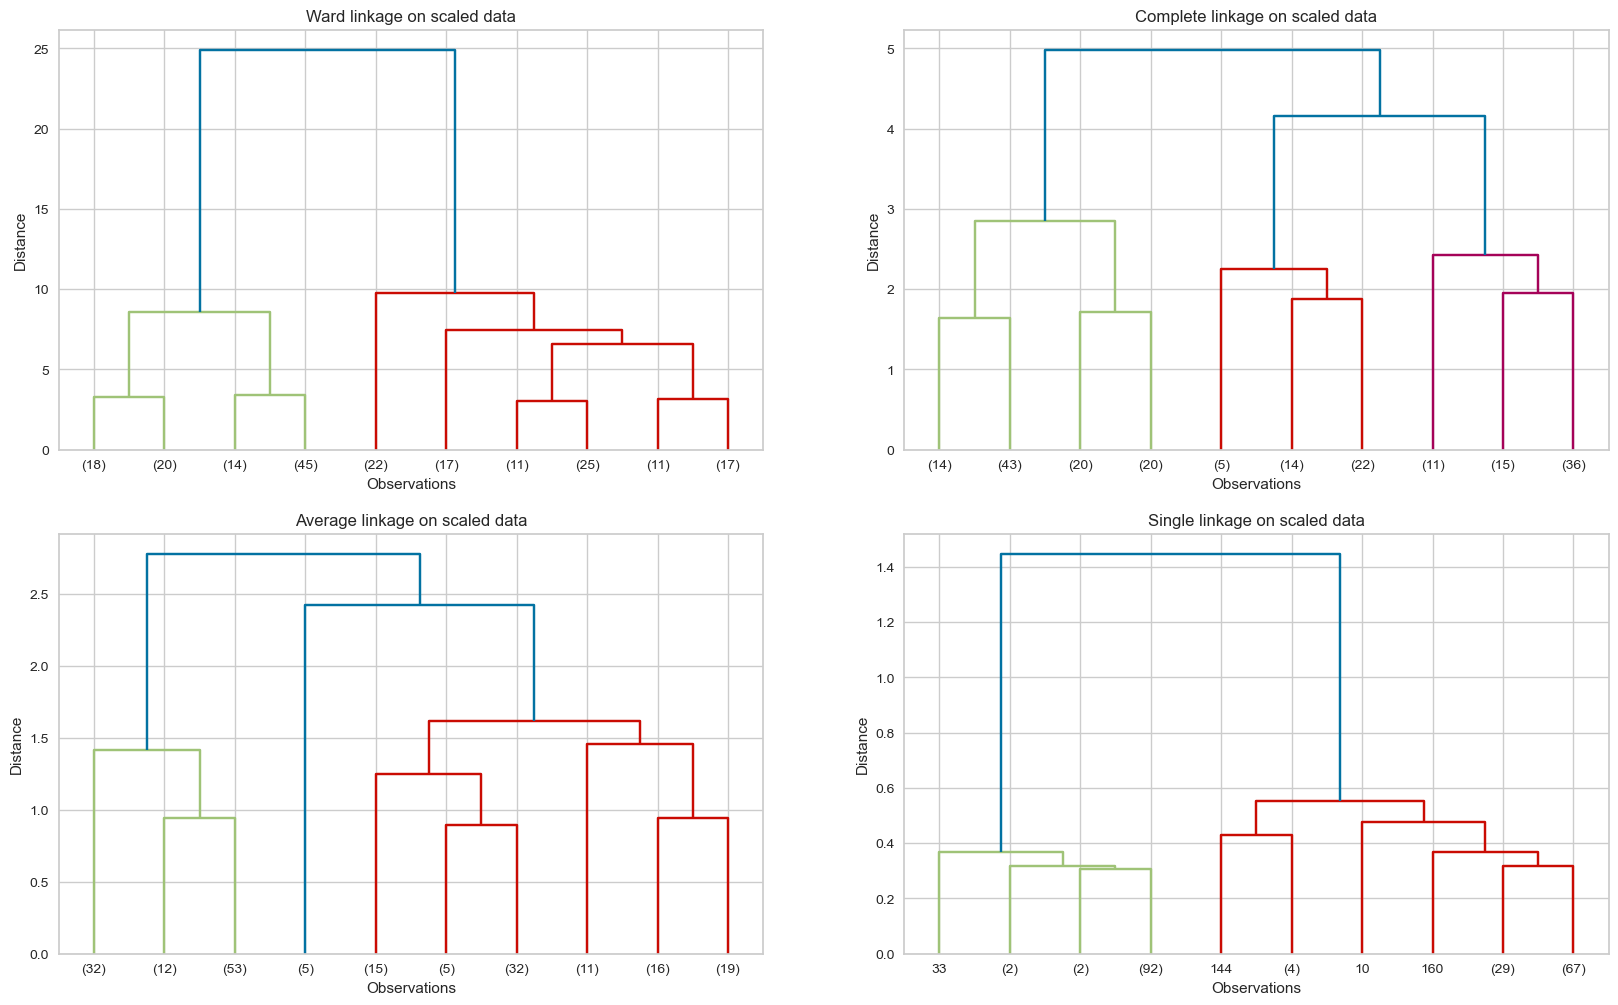

In [462]:
#On scaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_ward, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(222)
plt.title("Complete linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_complete, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(223)
plt.title("Average linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_average, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(224)
plt.title("Single linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Age_Sscore_scaled_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

## Clustering based on Annual Income and Spending Score- x2

In [441]:
x2 = df_Sscore_Aincome.copy()
x2.head(2)

Spending_Score  Annual_Income  predicted_clusters_Kmeans
0              39             15                          2
1              81             15                          3

In [442]:
x2_scaled= df_Sscore_Aincome_scaled.copy()
x2_scaled.head(2)

Spending_Score  Annual_Income  predicted_clusters_Kmeans
0       -0.434801      -1.738999                          2
1        1.195704      -1.738999                          3

In [443]:
#On unscaled data
hc_Sscore_Aincome_ward = linkage(y=x2, method="ward")
hc_Sscore_Aincome_complete = linkage(x2, "complete")
hc_Sscore_Aincome_average = linkage(x2, "average")
hc_Sscore_Aincome_single = linkage(x2, "single")

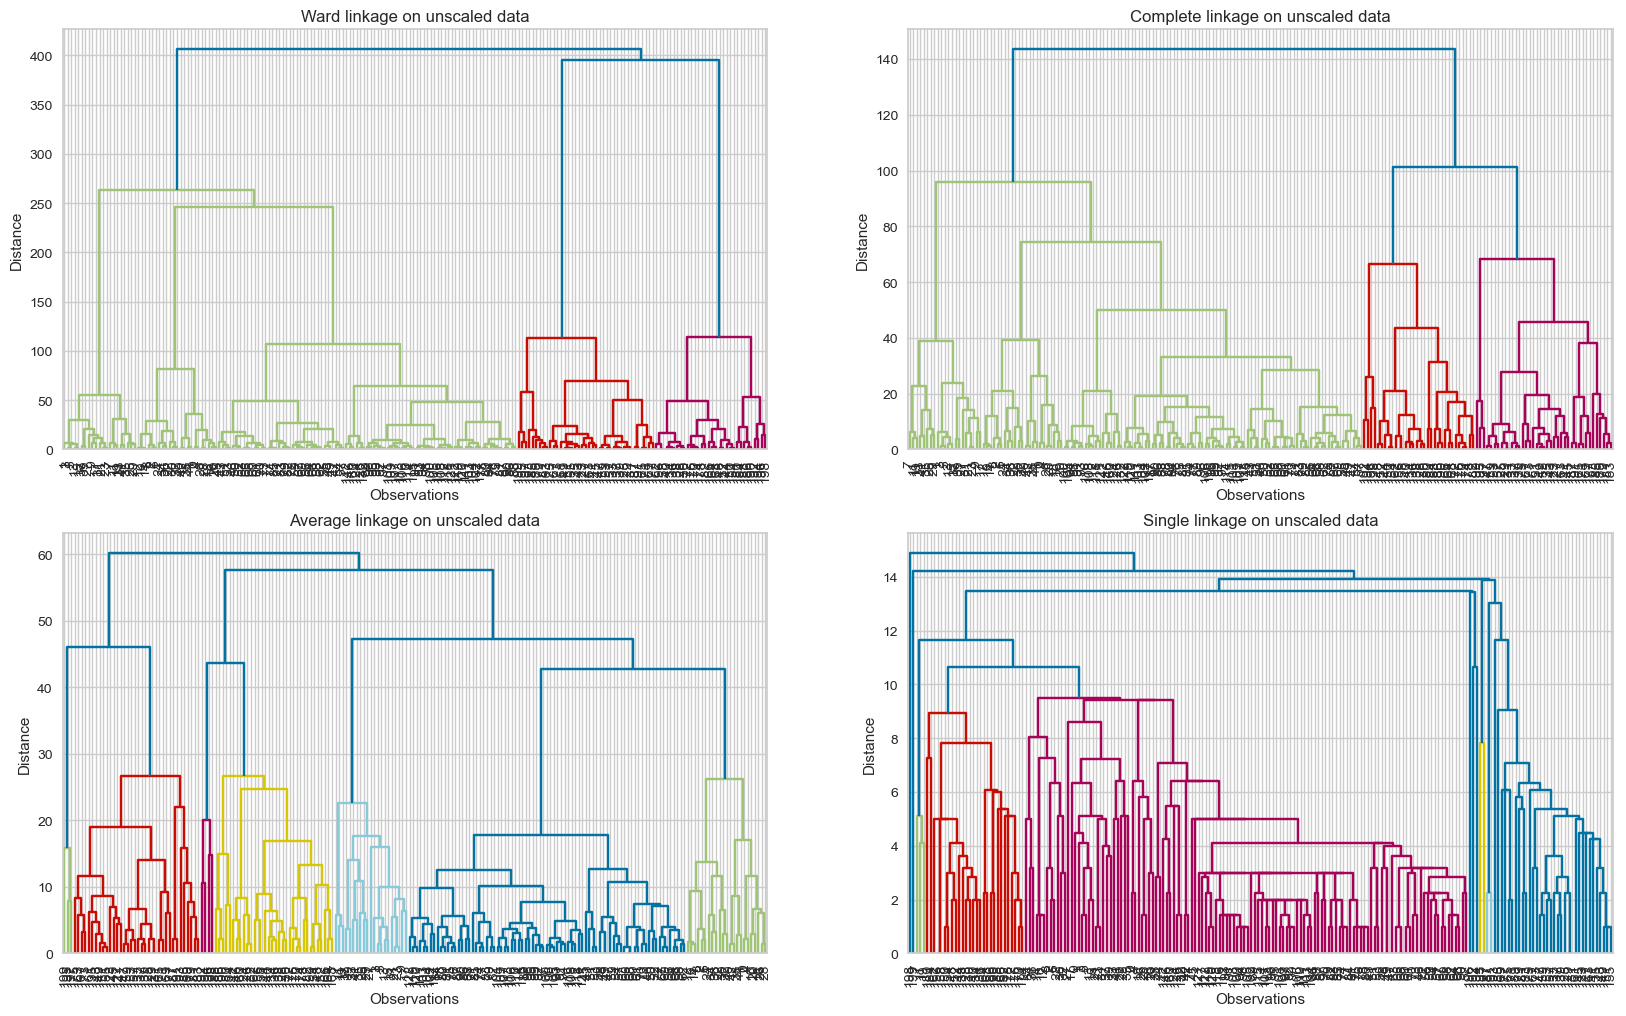

In [444]:
#On unscaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_ward, leaf_font_size = 10);

plt.subplot(222)
plt.title("Complete linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_complete, leaf_font_size = 10);

plt.subplot(223)
plt.title("Average linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_average, leaf_font_size = 10);

plt.subplot(224)
plt.title("Single linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_single, leaf_font_size = 10);

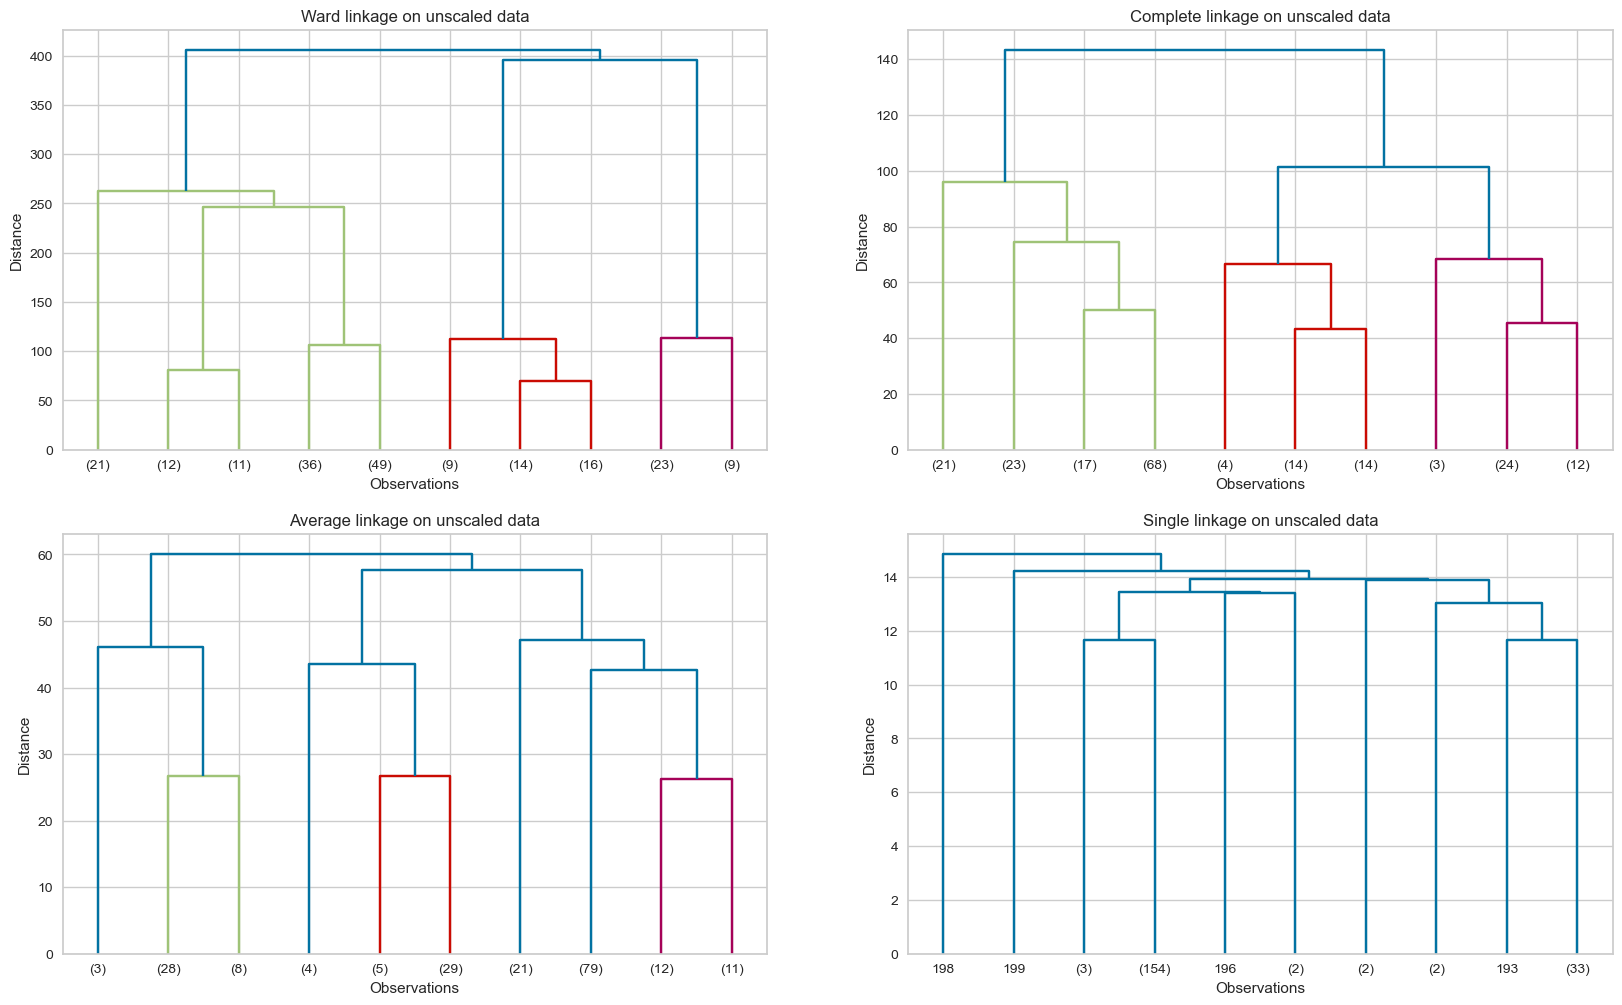

In [445]:
#On unscaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_ward, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(222)
plt.title("Complete linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_complete, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(223)
plt.title("Average linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_average, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(224)
plt.title("Single linkage on unscaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [447]:
#On scaled data
hc_Sscore_Aincome_scaled_ward = linkage(y=x2_scaled, method="ward")
hc_Sscore_Aincome_scaled_complete = linkage(x2_scaled, "complete")
hc_Sscore_Aincome_scaled_average = linkage(x2_scaled, "average")
hc_Sscore_Aincome_scaled_single = linkage(x2_scaled, "single")

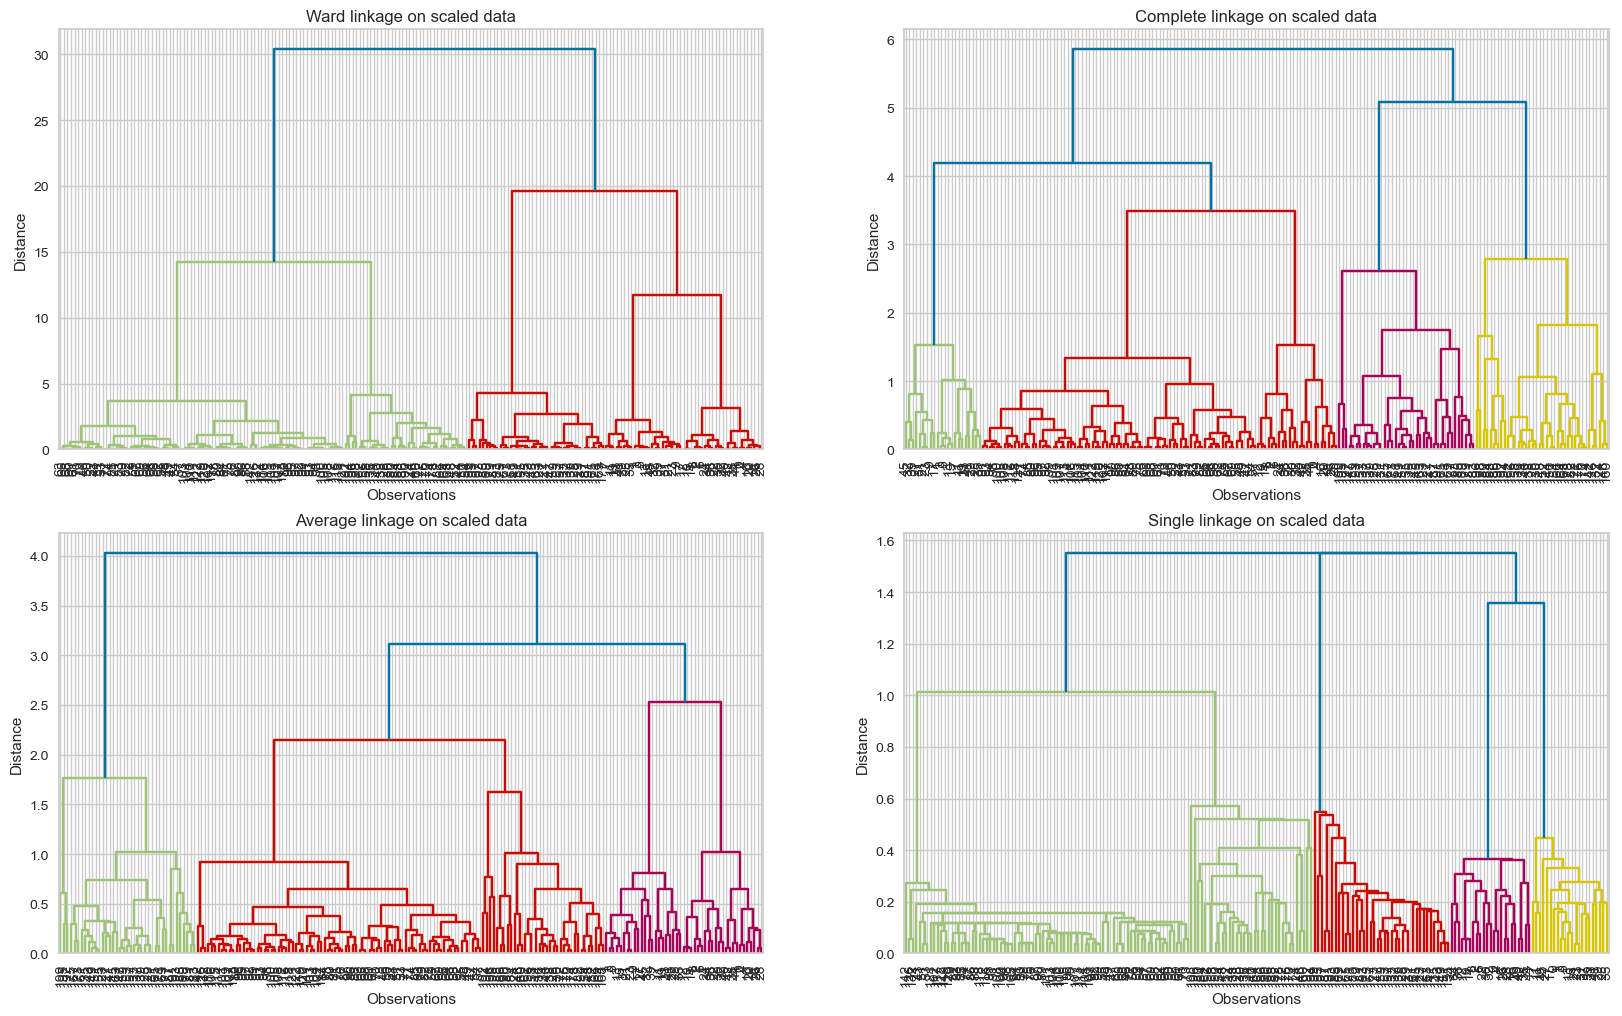

In [448]:
#On unscaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_ward, leaf_font_size = 10);

plt.subplot(222)
plt.title("Complete linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_complete, leaf_font_size = 10);

plt.subplot(223)
plt.title("Average linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_average, leaf_font_size = 10);

plt.subplot(224)
plt.title("Single linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_single, leaf_font_size = 10);

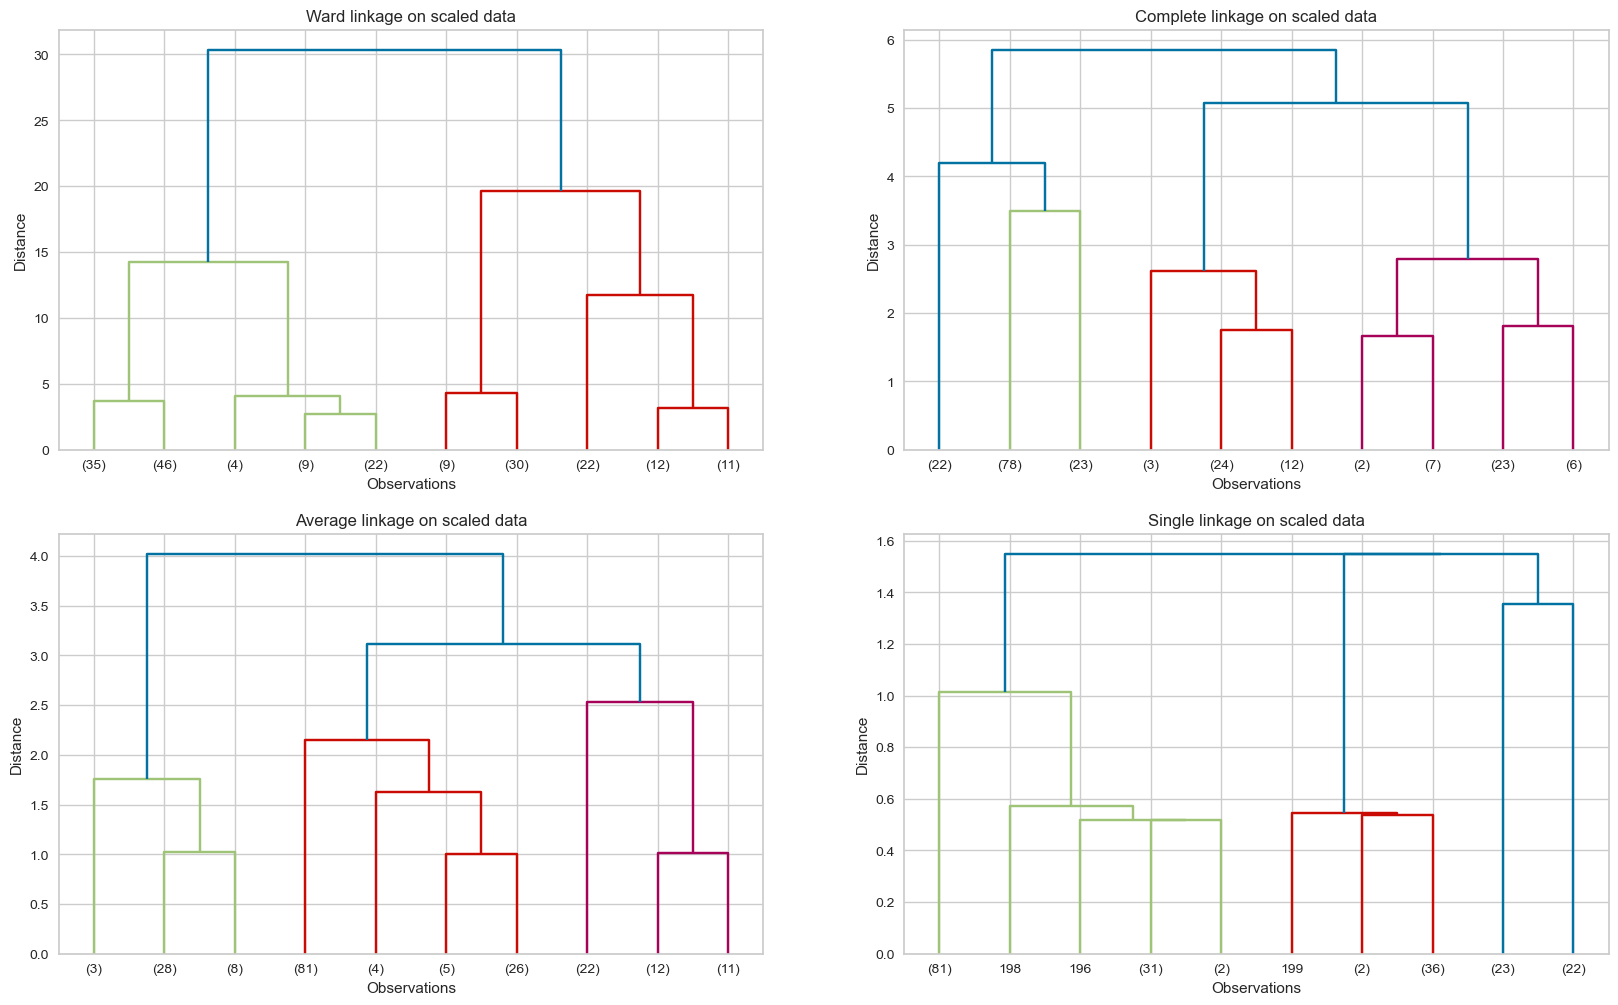

In [449]:
#On unscaled data
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_ward, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(222)
plt.title("Complete linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_complete, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(223)
plt.title("Average linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_average, leaf_font_size = 10, truncate_mode='lastp', p=10);

plt.subplot(224)
plt.title("Single linkage on scaled data")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_Sscore_Aincome_scaled_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

I We will continue with ward as ward provides the minimum distance between clusters and the maximum distance between clusters.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [450]:
#Silhouette Score on unscaled data
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    AggModel_Age_Sscore = AgglomerativeClustering(n_clusters=num_clusters)
    AggModel_Age_Sscore.fit(x1)
    cluster_labels = AggModel_Age_Sscore.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837


In [451]:
AggModel_Age_Sscore = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
clusters_Age_Sscore = AggModel_Age_Sscore.fit_predict(x1)

In [452]:
x1["predicted_clusters_HC"] = clusters_Age_Sscore
x1.head()

Age  Spending_Score  predicted_clusters_Kmeans  predicted_clusters_HC
0   19              39                          3                      0
1   21              81                          2                      3
2   20               6                          1                      2
3   23              77                          2                      3
4   31              40                          3                      0

<Figure size 2000x1000 with 0 Axes>

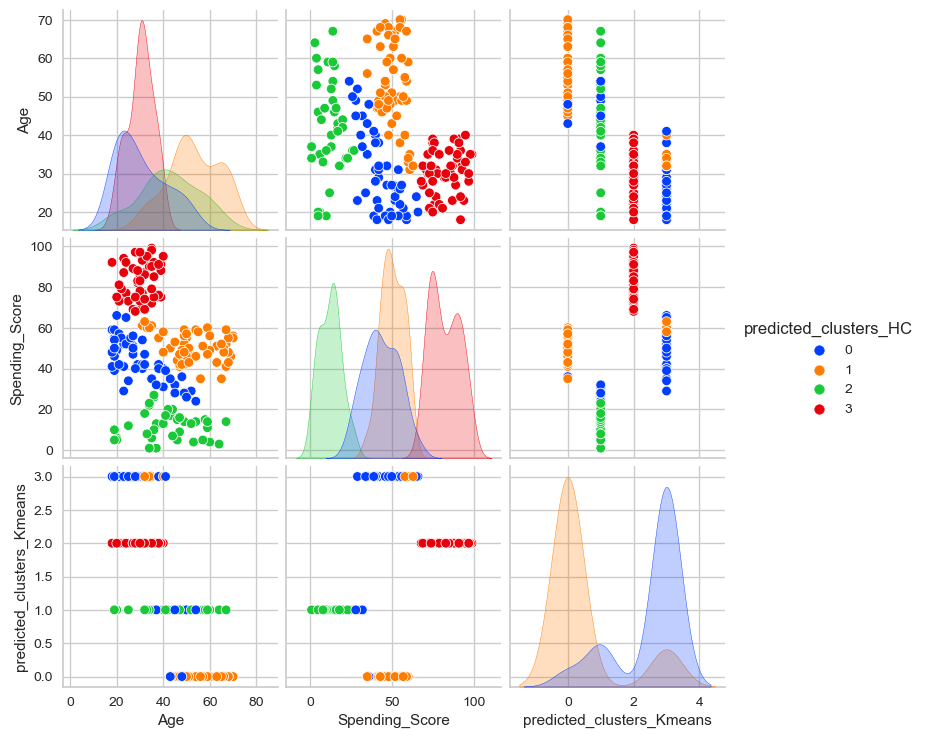

In [454]:
plt.figure(figsize = (20,10))
sns.pairplot(data=x1, hue="predicted_clusters_HC", palette="bright");

In [453]:
#Silhouette Score on scaled data
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    AggModel_Age_Sscore_scaled = AgglomerativeClustering(n_clusters=num_clusters)
    AggModel_Age_Sscore_scaled.fit(x1_scaled)
    cluster_labels = AggModel_Age_Sscore_scaled.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5239556361475451
For n_clusters=3, the silhouette score is 0.46153279607945885
For n_clusters=4, the silhouette score is 0.397717072183959
For n_clusters=5, the silhouette score is 0.4033321729485472
For n_clusters=6, the silhouette score is 0.4620150085409302
For n_clusters=7, the silhouette score is 0.3878173190442593
For n_clusters=8, the silhouette score is 0.3958354123485883


In [456]:
#Agglomerative on scaled data
AggModel_Age_Sscore_scaled = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")
clusters_Age_Sscore_scaled = AggModel_Age_Sscore_scaled.fit_predict(x1_scaled)

In [457]:
x1_scaled["predicted_clusters_HC"] = clusters_Age_Sscore_scaled
x1_scaled.head()

Age  Spending_Score  predicted_clusters_Kmeans  predicted_clusters_HC
0 -1.424569       -0.434801                          1                      1
1 -1.281035        1.195704                          1                      1
2 -1.352802       -1.715913                          0                      0
3 -1.137502        1.040418                          1                      1
4 -0.563369       -0.395980                          1                      1

<Figure size 2000x1000 with 0 Axes>

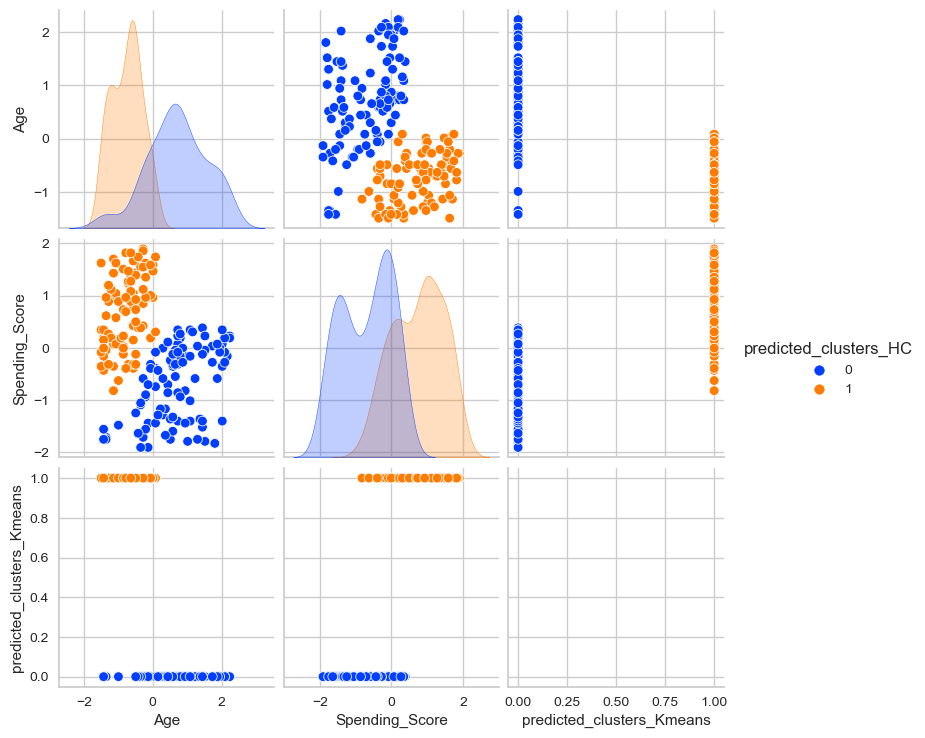

In [458]:
plt.figure(figsize = (20,10))
sns.pairplot(data=x1_scaled, hue="predicted_clusters_HC", palette="bright");

According to the 4 clusters with unscaled data, we see that the cluster does not make a good distinction between customers based on age and spending score. But we see that the 2 clusters with scaled data make a better distinction between customers.

#### Annual Income and Spending Score- x2

In [468]:
#Silhouette Score on unscaled data
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    AggModel_Sscore_Aincome = AgglomerativeClustering(n_clusters=num_clusters)
    AggModel_Sscore_Aincome.fit(x2)
    cluster_labels = AggModel_Sscore_Aincome.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713


In [470]:
AggModel_Sscore_Aincome = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
clusters_Sscore_Aincome = AggModel_Sscore_Aincome.fit_predict(x2)

In [471]:
x2["predicted_clusters_HC"] = clusters_Sscore_Aincome
x2.head()

Spending_Score  Annual_Income  predicted_clusters_Kmeans  \
0              39             15                          2   
1              81             15                          3   
2               6             16                          2   
3              77             16                          3   
4              40             17                          2   

   predicted_clusters_HC  
0                      4  
1                      3  
2                      4  
3                      3  
4                      4

<Figure size 2000x1000 with 0 Axes>

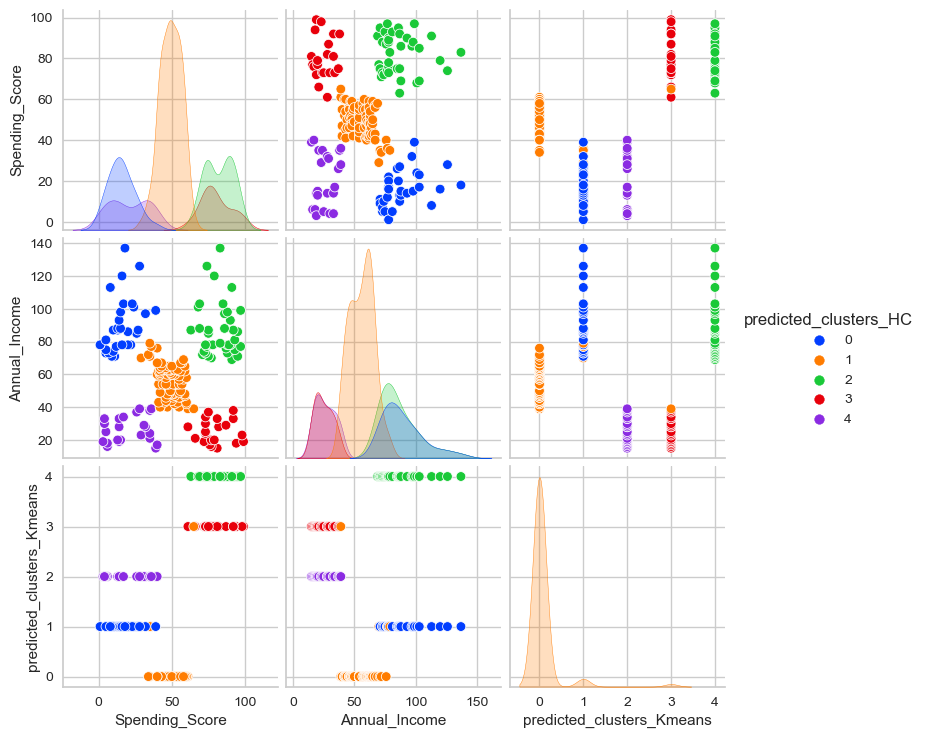

In [472]:
plt.figure(figsize = (20,10))
sns.pairplot(data=x2, hue="predicted_clusters_HC", palette="bright");

In [473]:
#Silhouette Score on scaled data
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    AggModel_Sscore_Aincome_scaled = AgglomerativeClustering(n_clusters=num_clusters)
    AggModel_Sscore_Aincome_scaled.fit(x2_scaled)
    cluster_labels = AggModel_Sscore_Aincome_scaled.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5234259096704396
For n_clusters=3, the silhouette score is 0.57673750163457
For n_clusters=4, the silhouette score is 0.6280789340729307
For n_clusters=5, the silhouette score is 0.6915071284226041
For n_clusters=6, the silhouette score is 0.6490520858160557
For n_clusters=7, the silhouette score is 0.6312918587964707
For n_clusters=8, the silhouette score is 0.496283122214545


In [474]:
AggModel_Sscore_Aincome_scaled = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
clusters_Sscore_Aincome_scaled = AggModel_Sscore_Aincome_scaled.fit_predict(x2_scaled)

In [475]:
x2_scaled["predicted_clusters_HC"] = clusters_Sscore_Aincome_scaled
x2_scaled.head()

Spending_Score  Annual_Income  predicted_clusters_Kmeans  \
0       -0.434801      -1.738999                          2   
1        1.195704      -1.738999                          3   
2       -1.715913      -1.700830                          2   
3        1.040418      -1.700830                          3   
4       -0.395980      -1.662660                          2   

   predicted_clusters_HC  
0                      2  
1                      4  
2                      2  
3                      4  
4                      2

<Figure size 2000x1000 with 0 Axes>

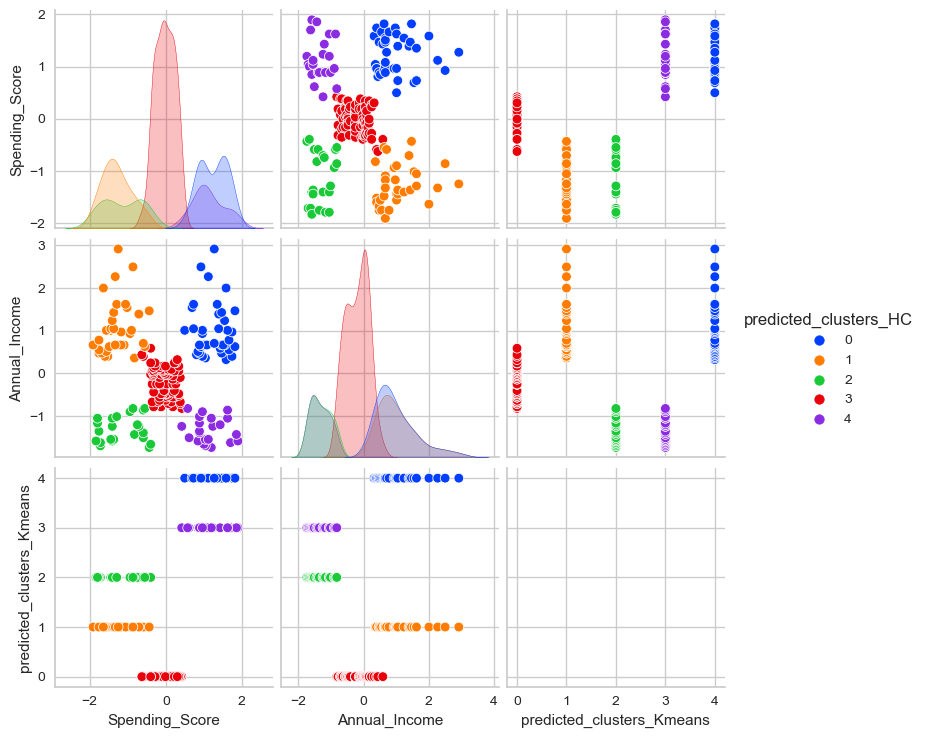

In [476]:
plt.figure(figsize = (20,10))
sns.pairplot(data=x2_scaled, hue="predicted_clusters_HC", palette="bright");

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [513]:
x1.head()

Age  Spending_Score  predicted_clusters_Kmeans  predicted_clusters_HC
0   19              39                          3                      0
1   21              81                          2                      3
2   20               6                          1                      2
3   23              77                          2                      3
4   31              40                          3                      0

In [514]:
x1_scaled.head()

Age  Spending_Score  predicted_clusters_Kmeans  predicted_clusters_HC
0 -1.424569       -0.434801                          1                      1
1 -1.281035        1.195704                          1                      1
2 -1.352802       -1.715913                          0                      0
3 -1.137502        1.040418                          1                      1
4 -0.563369       -0.395980                          1                      1

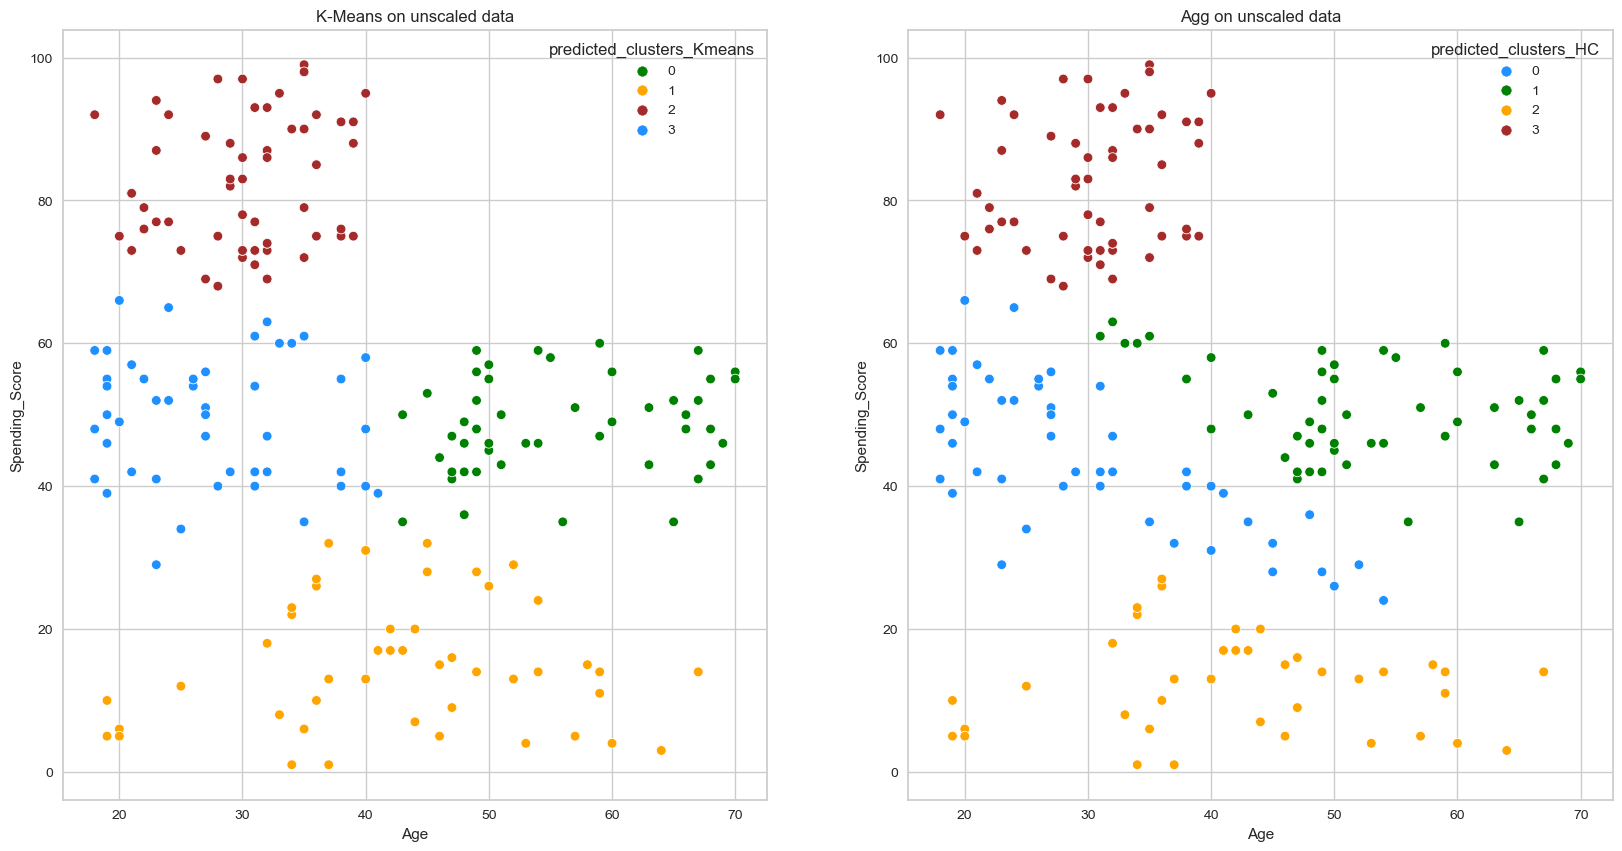

In [598]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='predicted_clusters_Kmeans', data=x1, palette=['green','orange','brown', 'dodgerblue'])
plt.title("K-Means on unscaled data")

plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='predicted_clusters_HC', data=x1, palette=['dodgerblue','green', 'orange','brown'])
plt.title("Agg on unscaled data");


In [615]:
# It is necessary to pay attention to this. Kmeans is better separated.
# Hierarchical Clustering has not drawn the cluster boundaries sharply.

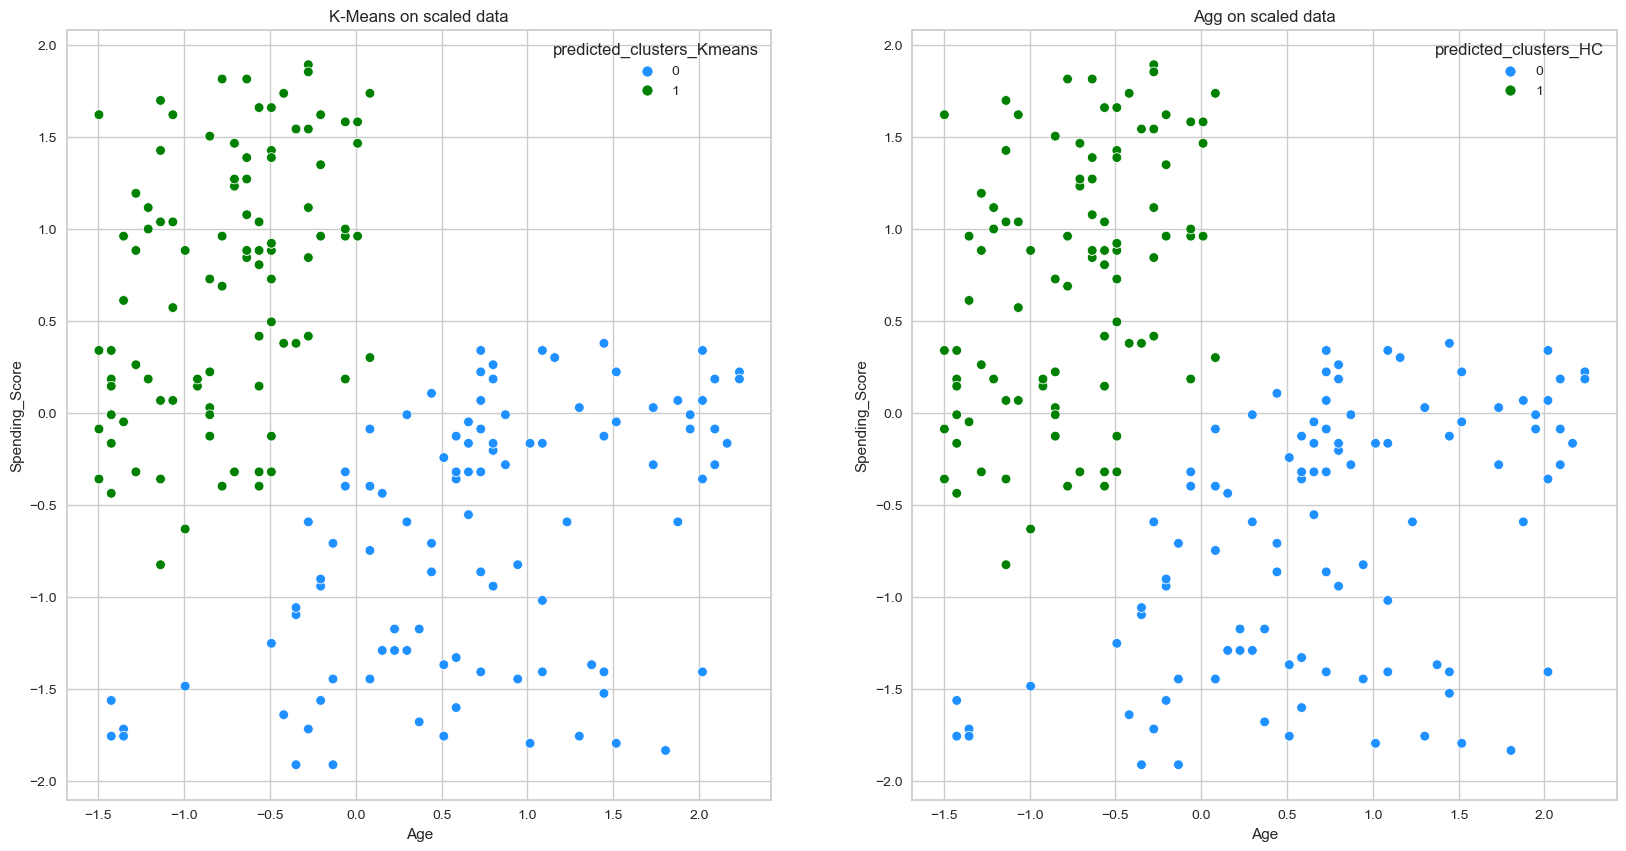

In [599]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='predicted_clusters_Kmeans', data=x1_scaled, palette=['dodgerblue','green'])
plt.title("K-Means on scaled data")

plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='predicted_clusters_HC', data=x1_scaled, palette=['dodgerblue','green'])
plt.title("Agg on scaled data");


#### Annual Income and Spending Score- x2

In [511]:
x2.head()

Spending_Score  Annual_Income  predicted_clusters_Kmeans  \
0              39             15                          2   
1              81             15                          3   
2               6             16                          2   
3              77             16                          3   
4              40             17                          2   

   predicted_clusters_HC  
0                      4  
1                      3  
2                      4  
3                      3  
4                      4

In [512]:
x2_scaled.head()

Spending_Score  Annual_Income  predicted_clusters_Kmeans  \
0       -0.434801      -1.738999                          2   
1        1.195704      -1.738999                          3   
2       -1.715913      -1.700830                          2   
3        1.040418      -1.700830                          3   
4       -0.395980      -1.662660                          2   

   predicted_clusters_HC  
0                      2  
1                      4  
2                      2  
3                      4  
4                      2

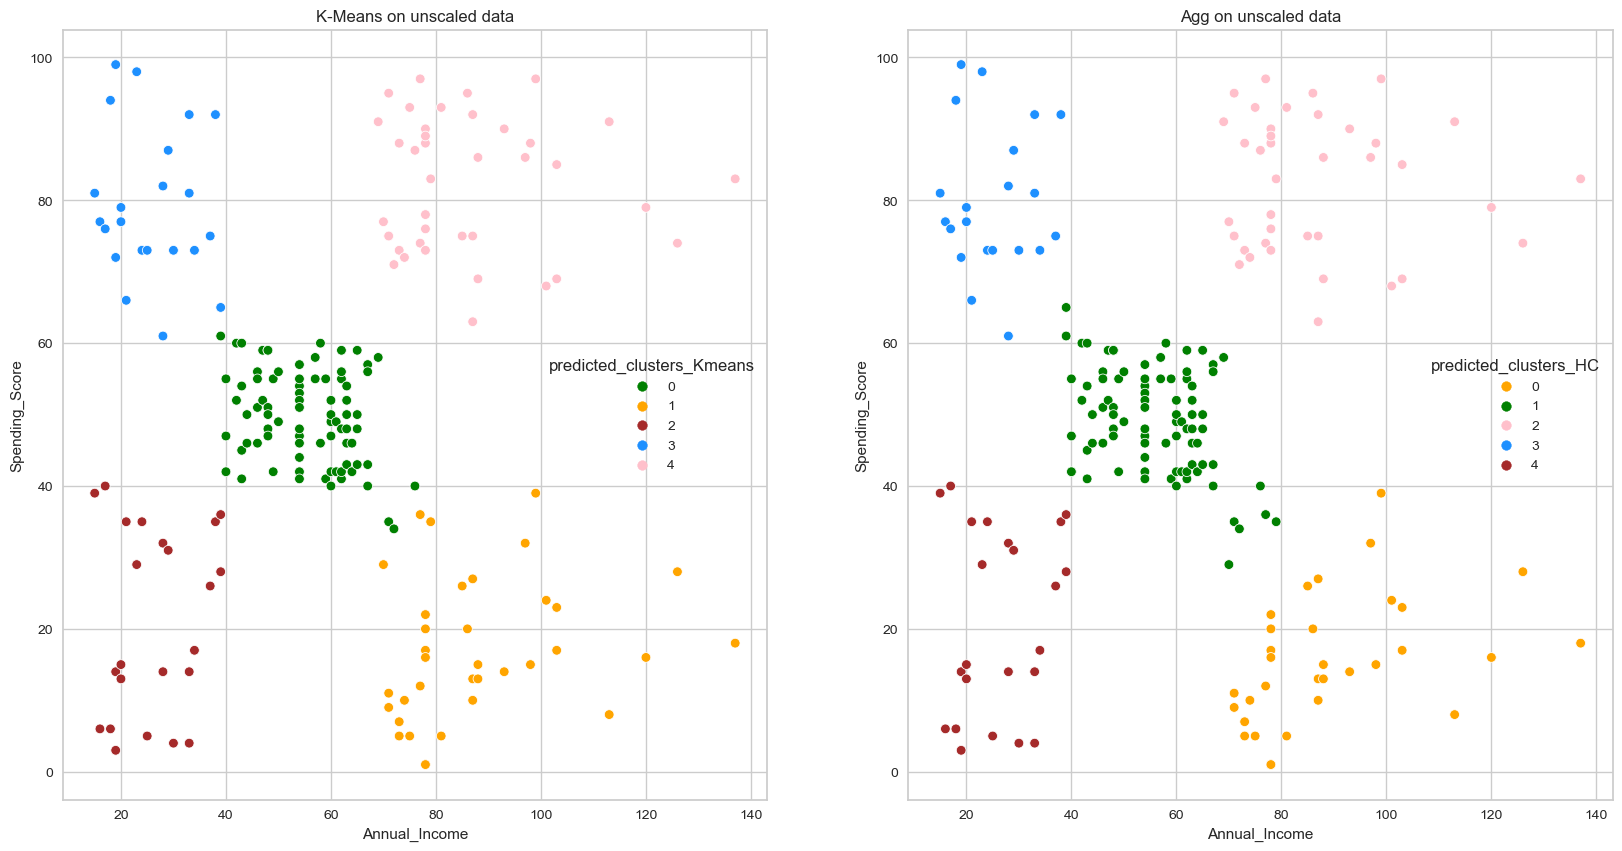

In [600]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='predicted_clusters_Kmeans', data=x2, palette=['green', 'orange','brown','dodgerblue','pink'])
plt.title("K-Means on unscaled data")

plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='predicted_clusters_HC', data=x2, palette=['orange', 'green','pink', 'dodgerblue', 'brown'])
plt.title("Agg on unscaled data");


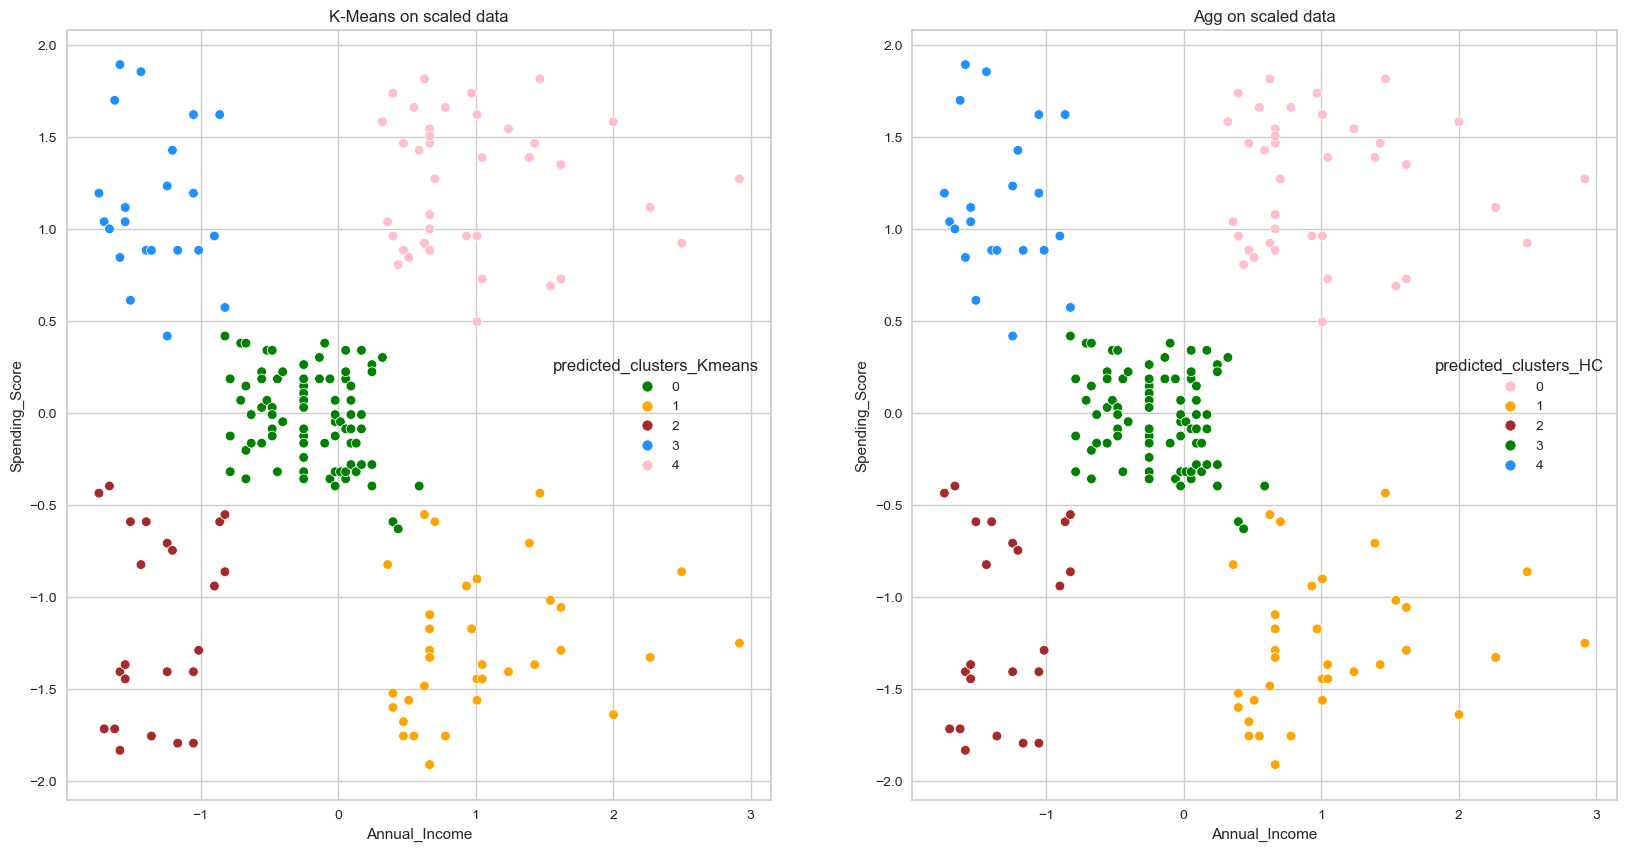

In [601]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='predicted_clusters_Kmeans', data=x2_scaled, palette=['green', 'orange','brown','dodgerblue','pink'])
plt.title("K-Means on scaled data")

plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='predicted_clusters_HC', data=x2_scaled, palette=['pink','orange','brown','green','dodgerblue',])
plt.title("Agg on scaled data");


In [617]:
# There are healthier transitions in Kmeans

#### Interpretation based on Age and Spending Score- x1

In [521]:
#K_Means vs HC
pd.crosstab(x1.predicted_clusters_Kmeans,x1.predicted_clusters_HC)

predicted_clusters_HC       0   1   2   3
predicted_clusters_Kmeans                
0                           3  45   0   0
1                           8   0  40   0
2                           0   0   0  57
3                          39   8   0   0

In [534]:
X1= x1[['Age','Spending_Score']]
X1_scaled = x1_scaled[['Age','Spending_Score']]

In [532]:
# K-Means Clustering on unscaled data
Kmean_model_Age_Score = KMeans(n_clusters = 4, random_state=42)
silhouette_score(X1, Kmean_model_Age_Score.fit_predict(X1))
#Best result

0.49973941540141753

In [533]:
# HC Clustering on unscaled data
AggModel_Age_Sscore = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
silhouette_score(X1, AggModel_Age_Sscore.fit_predict(X1))

0.4602496389565028

In [536]:
# K-Means Clustering on scaled data
Kmean_model_Age_Score = KMeans(n_clusters = 2, random_state=42)

silhouette_score(X1_scaled, Kmean_model_Age_Score.fit_predict(X1_scaled))

0.4721271643062346

In [537]:
# HC Clustering on unscaled data
AggModel_Age_Sscore = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")
silhouette_score(X1_scaled, AggModel_Age_Sscore.fit_predict(X1_scaled))

0.41449964268735984

We can say K-means Clustering Model on unscaled data is more succesful, since its silhouette Score is higher than HC. We chose Kmeans algorithms.

In [516]:
x1.predicted_clusters_Kmeans.value_counts()

2    57
1    48
0    48
3    47
Name: predicted_clusters_Kmeans, dtype: int64

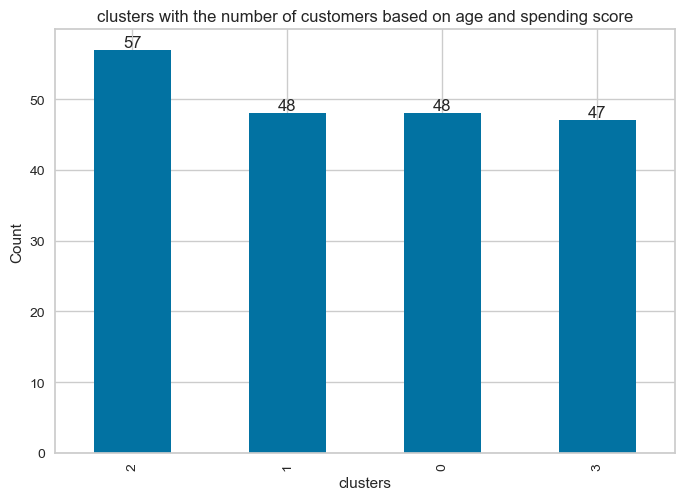

In [565]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers based on age and spending score")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x1.predicted_clusters_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [539]:
df.head()

Gender  Age  Annual_Income  Spending_Score
0    Male   19             15              39
1    Male   21             15              81
2  Female   20             16               6
3  Female   23             16              77
4  Female   31             17              40

In [571]:
df["cluster_Age_SpendingScore"] = x1.predicted_clusters_Kmeans
df.head()

Gender  Age  Annual_Income  Spending_Score  \
0    Male   19             15              39   
1    Male   21             15              81   
2  Female   20             16               6   
3  Female   23             16              77   
4  Female   31             17              40   

   cluster_AnnualIncome_SpendingScore  cluster_Age_SpendingScore  
0                                   2                          3  
1                                   3                          2  
2                                   2                          1  
3                                   3                          2  
4                                   2                          3

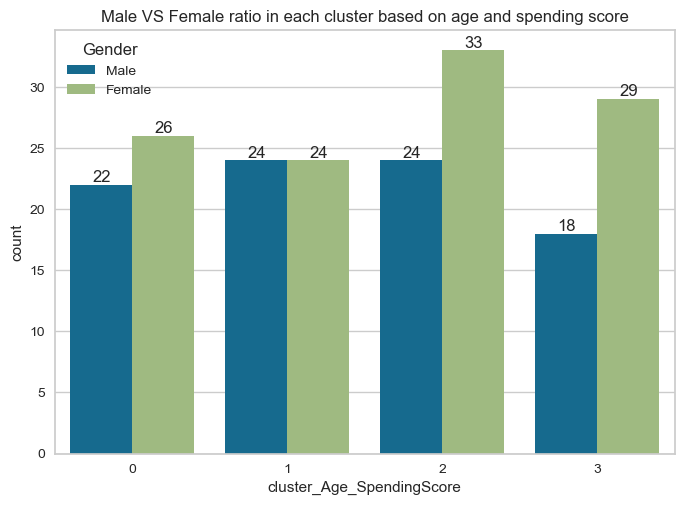

In [572]:
plt.title("Male VS Female ratio in each cluster based on age and spending score")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_SpendingScore, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [542]:
df.groupby("cluster_Age_SpendingScore").mean()

Age  Annual_Income  Spending_Score
cluster_Age_SpendingScore                                          
0                          55.708333      54.770833       48.229167
1                          43.291667      66.937500       15.020833
2                          30.175439      66.070175       82.350877
3                          27.617021      53.276596       49.148936

<Axes: xlabel='cluster_Age_SpendingScore', ylabel='Spending_Score'>

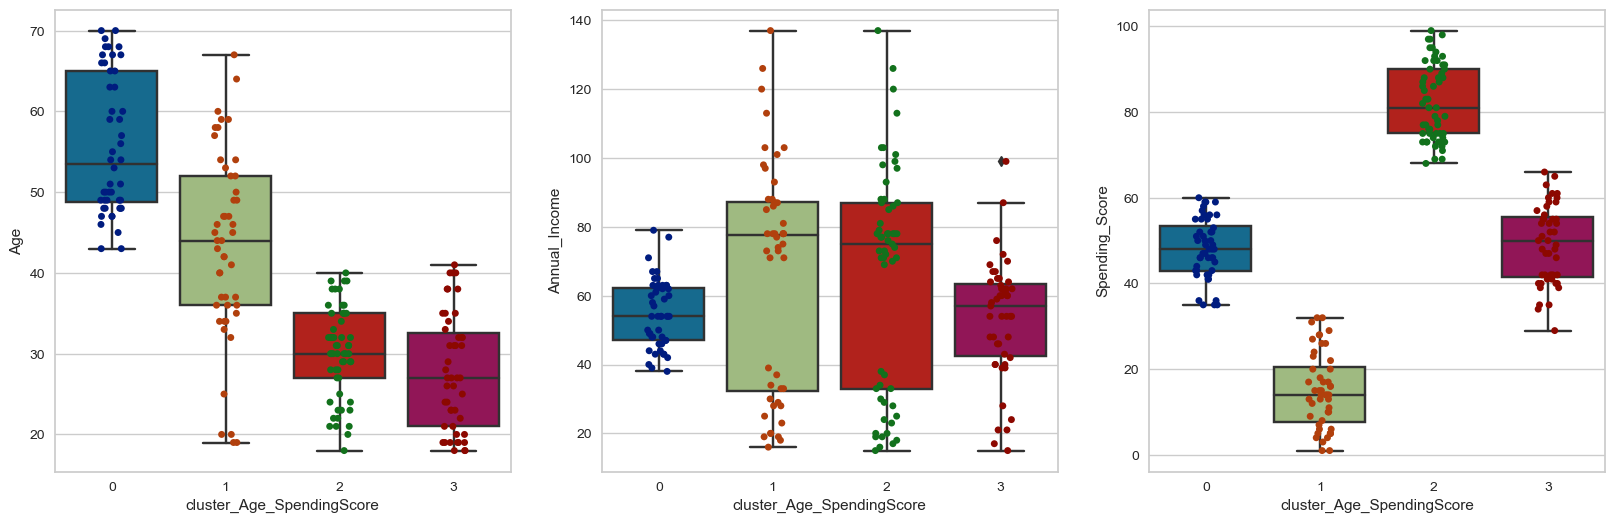

In [547]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_SpendingScore", data=df)
sns.stripplot(y="Age", x="cluster_Age_SpendingScore", data=df, palette="dark")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_SpendingScore", data=df)
sns.stripplot(y="Annual_Income", x="cluster_Age_SpendingScore", data=df, palette="dark")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_SpendingScore", data=df)
sns.stripplot(y="Spending_Score", x="cluster_Age_SpendingScore", data=df, palette="dark")


<Figure size 2000x1000 with 0 Axes>

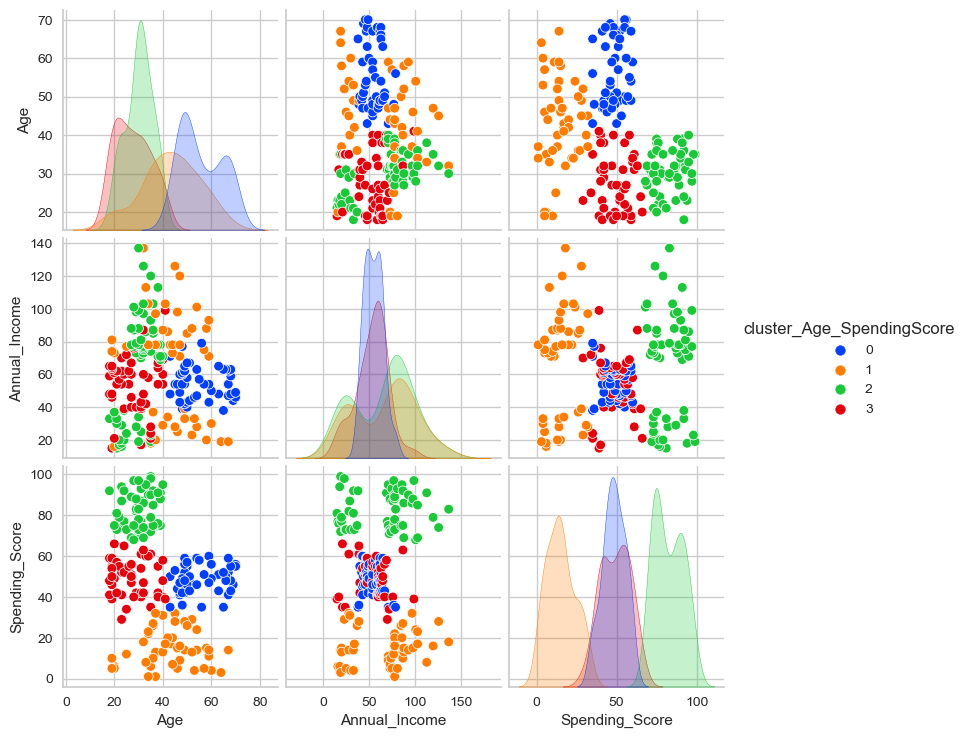

In [548]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df, hue="cluster_Age_SpendingScore", palette="bright");

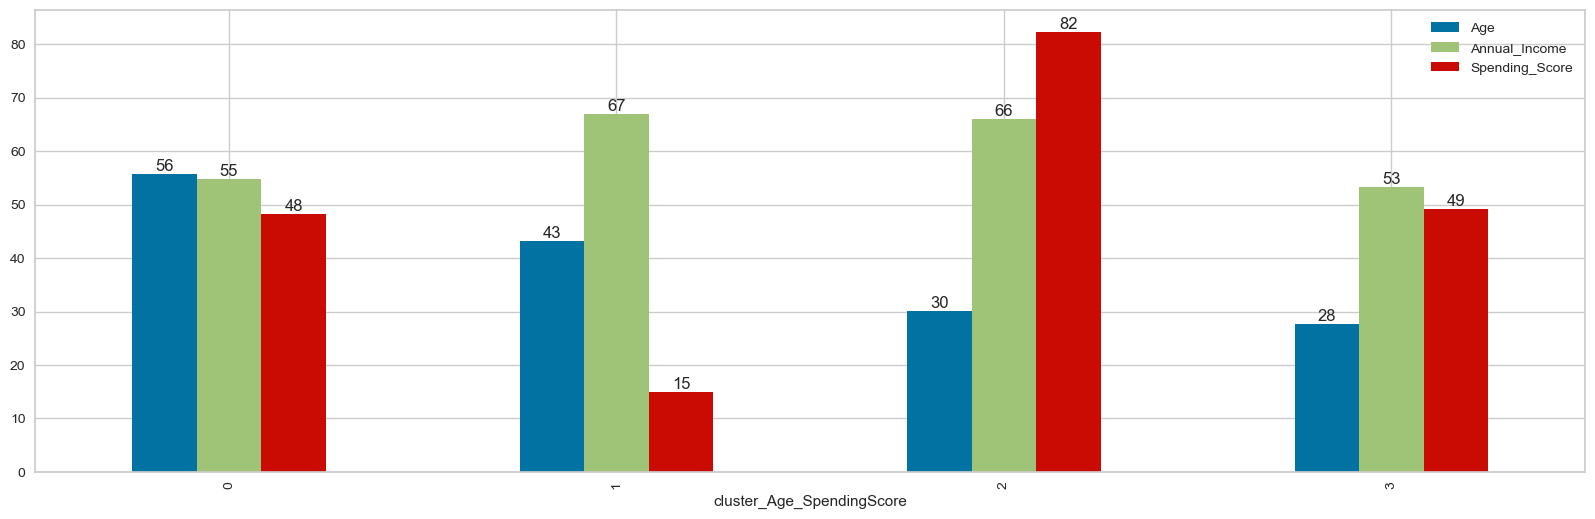

In [549]:
ax = df.groupby("cluster_Age_SpendingScore").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

### Conclusion

**cluster 0** : The average age is around 56, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [550]:
#K_Means vs HC
pd.crosstab(x2.predicted_clusters_Kmeans,x2.predicted_clusters_HC)

predicted_clusters_HC       0   1   2   3   4
predicted_clusters_Kmeans                    
0                           0  81   0   0   0
1                          32   3   0   0   0
2                           0   0   0   0  23
3                           0   1   0  21   0
4                           0   0  39   0   0

In [552]:
X2= x2[['Spending_Score','Annual_Income']]
X2_scaled = x2_scaled[['Spending_Score','Annual_Income']]

In [557]:
# K-Means Clustering on unscaled data
Kmean_model_Score_Aincome = KMeans(n_clusters = 5, random_state=42)
silhouette_score(X2, Kmean_model_Score_Aincome.fit_predict(X2))
#Best result

0.553931997444648

In [558]:
# HC Clustering on unscaled data
AggModel_Sscore_Aincome = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
silhouette_score(X2, AggModel_Sscore_Aincome.fit_predict(X2))

0.5529945955148897

In [559]:
# K-Means Clustering on scaled data
Kmean_model_Score_Aincome_scaled = KMeans(n_clusters = 5, random_state=42)
silhouette_score(X2_scaled, Kmean_model_Score_Aincome_scaled.fit_predict(X2_scaled))
#Best result

0.5546571631111091

In [560]:
# HC Clustering on scaled data
AggModel_Sscore_Aincome_scaled = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
silhouette_score(X2_scaled, AggModel_Sscore_Aincome_scaled.fit_predict(X2_scaled))

0.5538089226688662

We can say K-means Clustering Model on scaled data is more succesful, since its silhouette Score is higher than HC

In [561]:
x2.predicted_clusters_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters_Kmeans, dtype: int64

In [562]:
x2_scaled.predicted_clusters_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters_Kmeans, dtype: int64

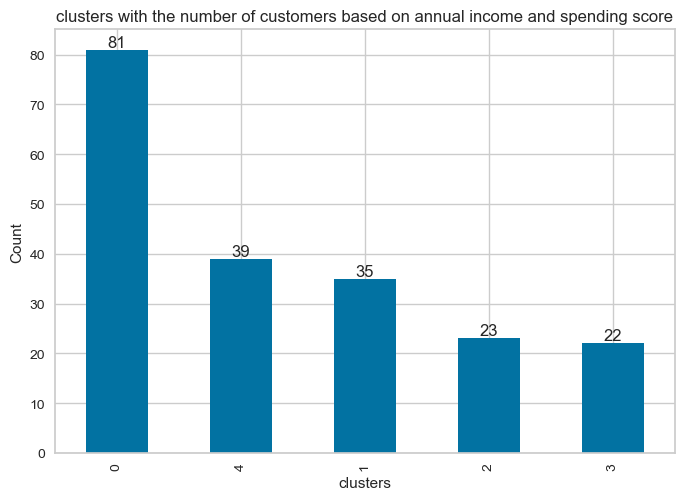

In [602]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers based on annual income and spending score")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x2.predicted_clusters_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [566]:
df.head()

Gender  Age  Annual_Income  Spending_Score  cluster_Age_SpendingScore
0    Male   19             15              39                          3
1    Male   21             15              81                          2
2  Female   20             16               6                          1
3  Female   23             16              77                          2
4  Female   31             17              40                          3

In [573]:
df.drop(columns= "cluster_Age_SpendingScore", inplace=True)

In [574]:
df["cluster_AnnualIncome_SpendingScore"] = x2.predicted_clusters_Kmeans
df.head()

Gender  Age  Annual_Income  Spending_Score  \
0    Male   19             15              39   
1    Male   21             15              81   
2  Female   20             16               6   
3  Female   23             16              77   
4  Female   31             17              40   

   cluster_AnnualIncome_SpendingScore  
0                                   2  
1                                   3  
2                                   2  
3                                   3  
4                                   2

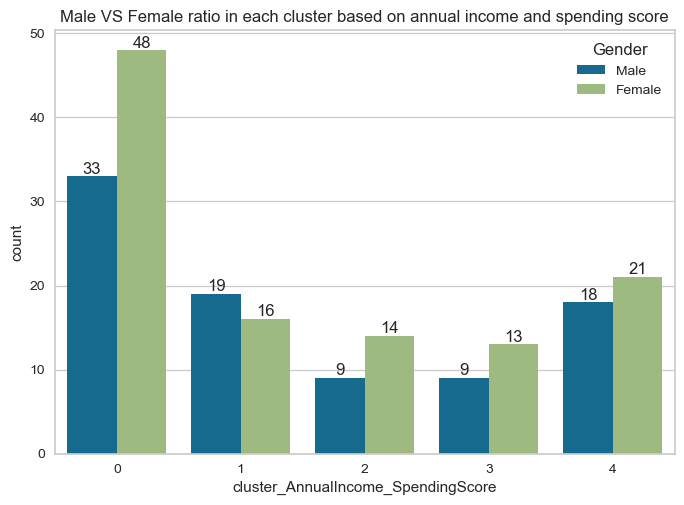

In [575]:
plt.title("Male VS Female ratio in each cluster based on annual income and spending score")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_AnnualIncome_SpendingScore, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [576]:
df.groupby("cluster_AnnualIncome_SpendingScore").mean()

Age  Annual_Income  Spending_Score
cluster_AnnualIncome_SpendingScore                                          
0                                   42.716049      55.296296       49.518519
1                                   41.114286      88.200000       17.114286
2                                   45.217391      26.304348       20.913043
3                                   25.272727      25.727273       79.363636
4                                   32.692308      86.538462       82.128205

<Axes: xlabel='cluster_AnnualIncome_SpendingScore', ylabel='Spending_Score'>

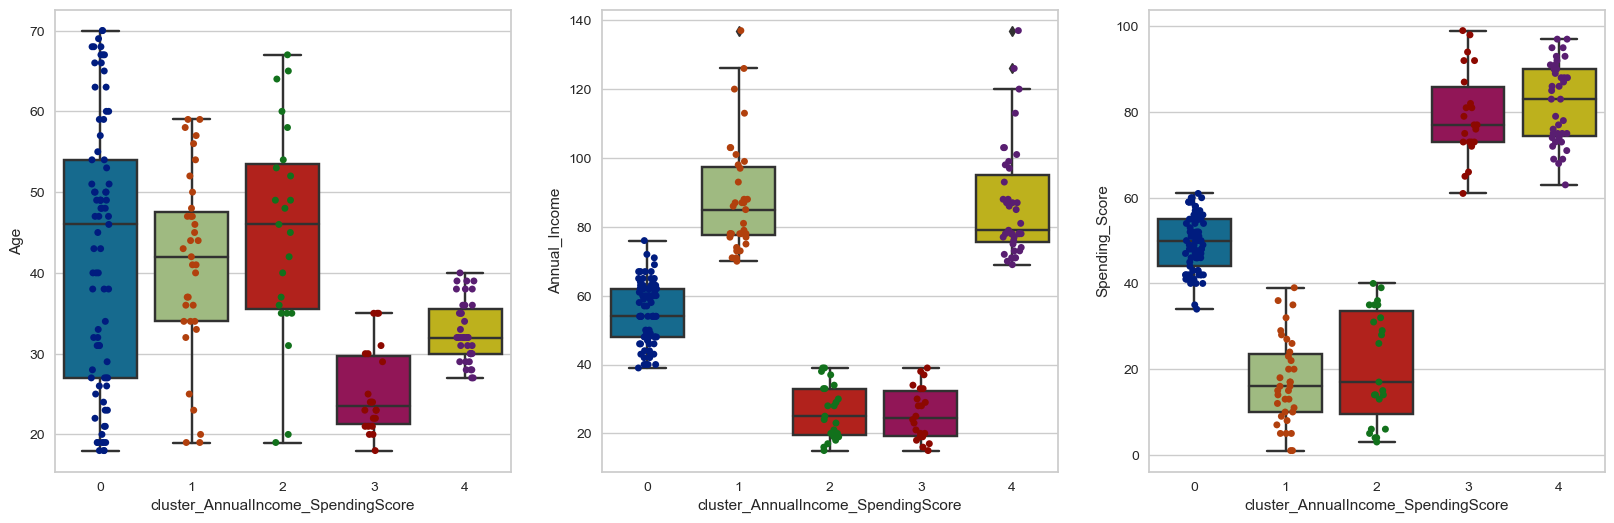

In [607]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_AnnualIncome_SpendingScore", data=df)
sns.stripplot(y="Age", x="cluster_AnnualIncome_SpendingScore", data=df, palette="dark")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_AnnualIncome_SpendingScore", data=df)
sns.stripplot(y="Annual_Income", x="cluster_AnnualIncome_SpendingScore", data=df, palette="dark")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_AnnualIncome_SpendingScore", data=df)
sns.stripplot(y="Spending_Score", x="cluster_AnnualIncome_SpendingScore", data=df, palette="dark")


<Figure size 2000x1000 with 0 Axes>

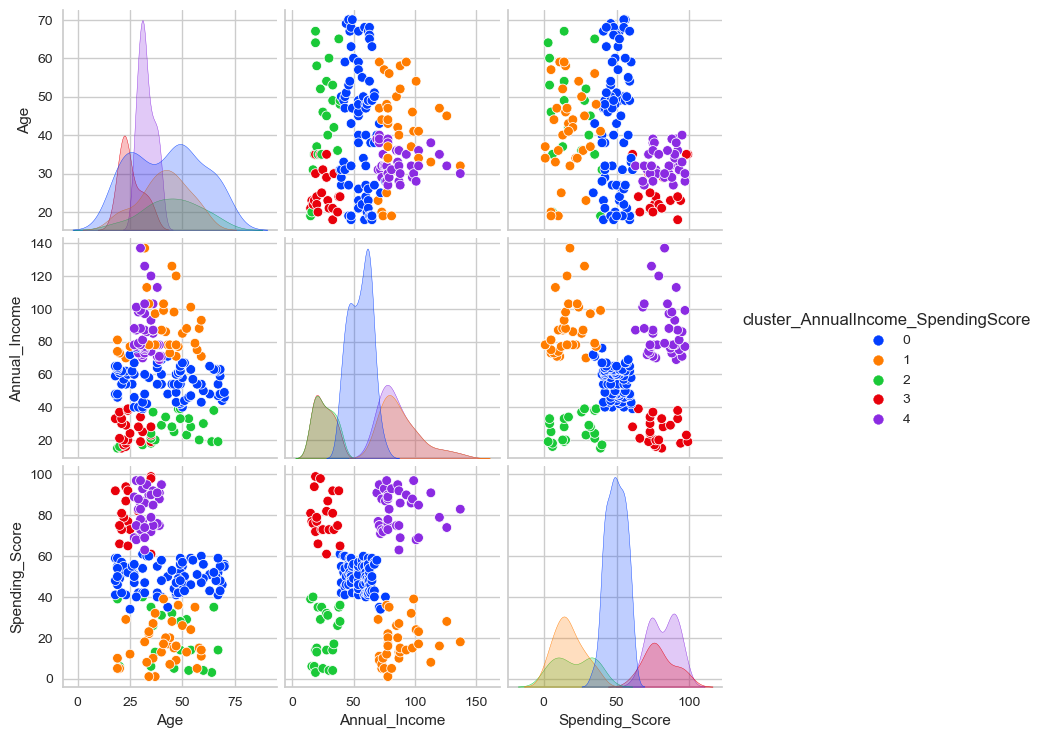

In [578]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df, hue="cluster_AnnualIncome_SpendingScore", palette="bright");

In [580]:
df.groupby(["Gender", "cluster_AnnualIncome_SpendingScore"]).mean()

Age  Annual_Income  \
Gender cluster_AnnualIncome_SpendingScore                             
Female 0                                   40.895833      55.354167   
       1                                   43.250000      90.937500   
       2                                   43.214286      27.357143   
       3                                   25.461538      25.692308   
       4                                   32.190476      86.047619   
Male   0                                   45.363636      55.212121   
       1                                   39.315789      85.894737   
       2                                   48.333333      24.666667   
       3                                   25.000000      25.777778   
       4                                   33.277778      87.111111   

                                           Spending_Score  
Gender cluster_AnnualIncome_SpendingScore                  
Female 0                                        49.000000  
       1                                        22.062500  
       2                                        21.714286  
       3                                        80.538462  
       4                                        81.666667  
Male   0                                        50.272727  
       1                                        12.947368  
       2                                        19.666667  
       3                                        77.666667  
       4                                        82.666667

<Axes: xlabel='cluster_AnnualIncome_SpendingScore', ylabel='Spending_Score'>

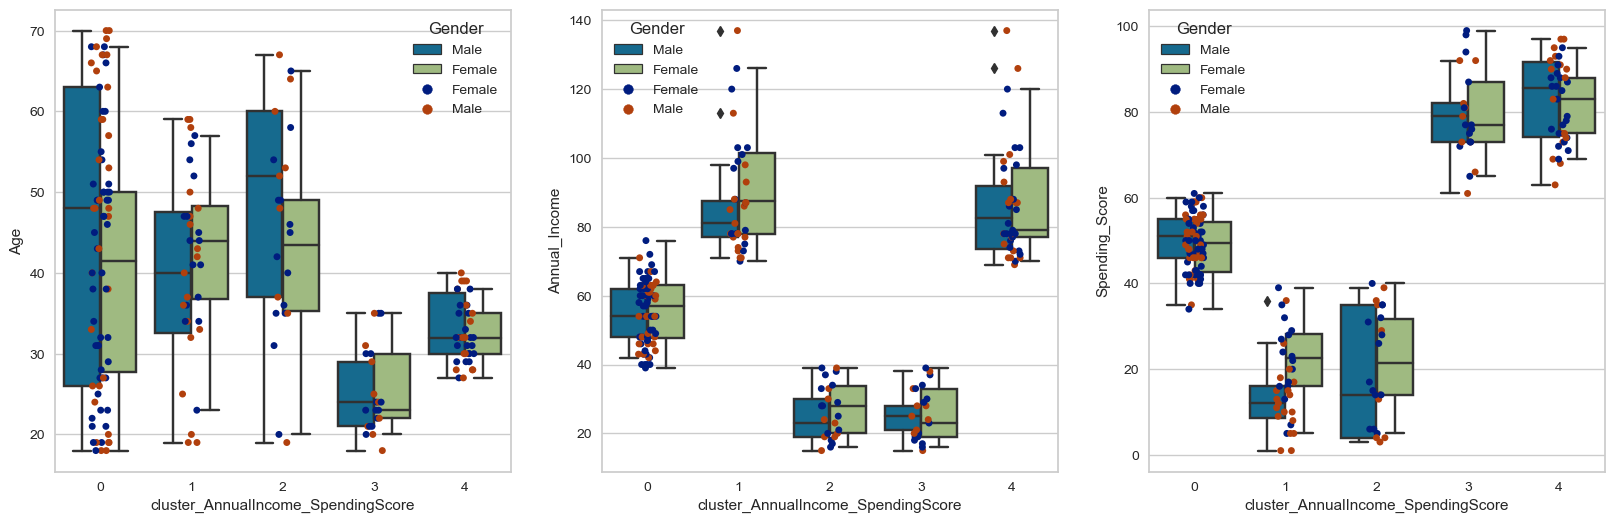

In [608]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_AnnualIncome_SpendingScore", data=df , hue ="Gender")
sns.stripplot(y="Age", x="cluster_AnnualIncome_SpendingScore", data=df, palette="dark", hue ="Gender")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_AnnualIncome_SpendingScore", data=df, hue ="Gender")
sns.stripplot(y="Annual_Income", x="cluster_AnnualIncome_SpendingScore", data=df, palette="dark", hue ="Gender")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_AnnualIncome_SpendingScore", data=df, hue ="Gender")
sns.stripplot(y="Spending_Score", x="cluster_AnnualIncome_SpendingScore", data=df, palette="dark", hue ="Gender")


<Figure size 800x550 with 0 Axes>

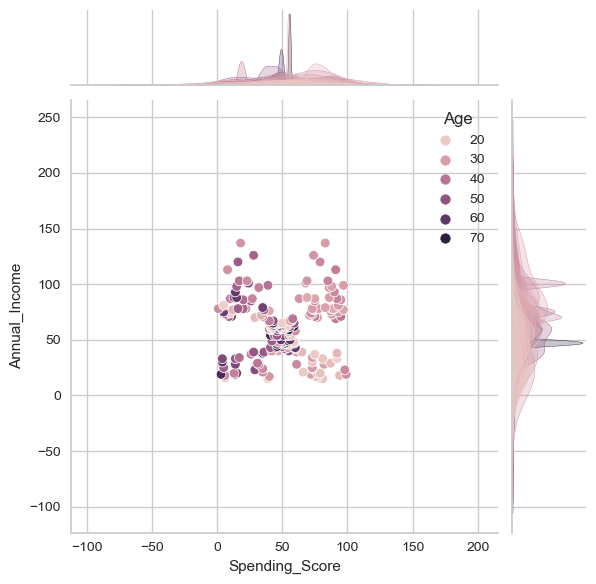

In [582]:
plt.figure()
sns.jointplot(x=df["Spending_Score"], y=df["Annual_Income"], hue=df["Age"])
plt.show()

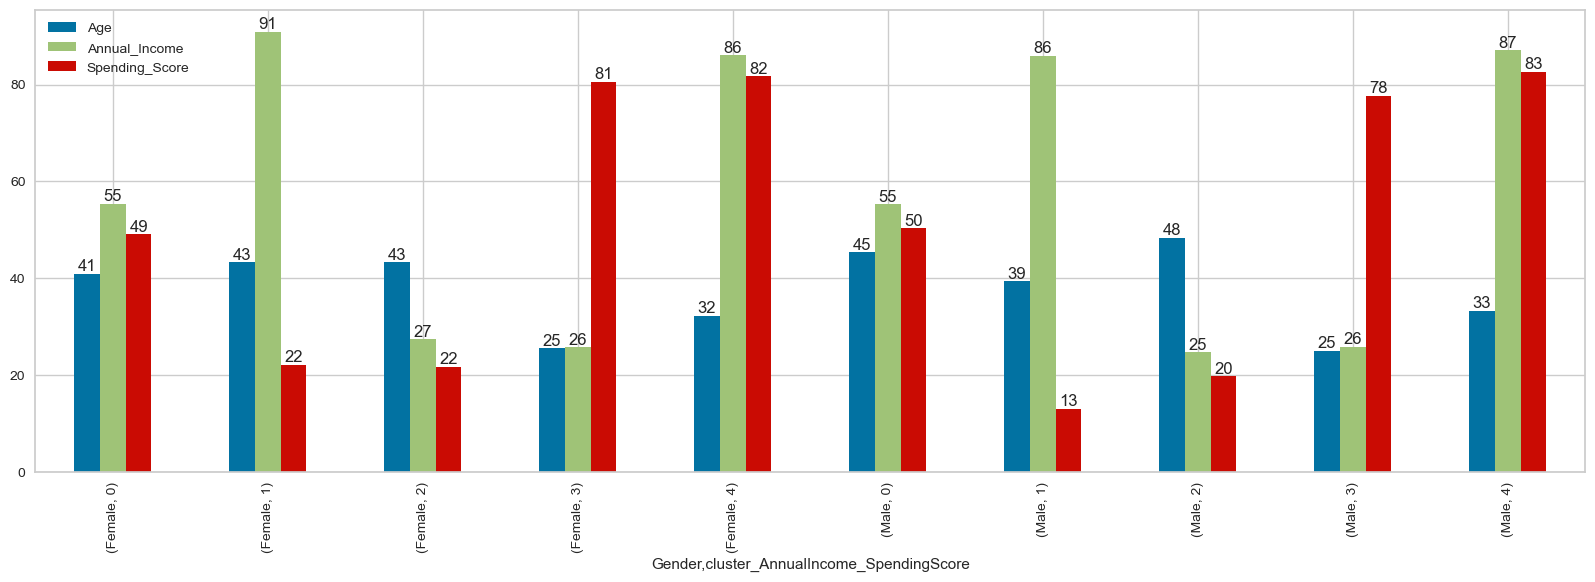

In [609]:
ax = df.groupby(["Gender", "cluster_AnnualIncome_SpendingScore"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

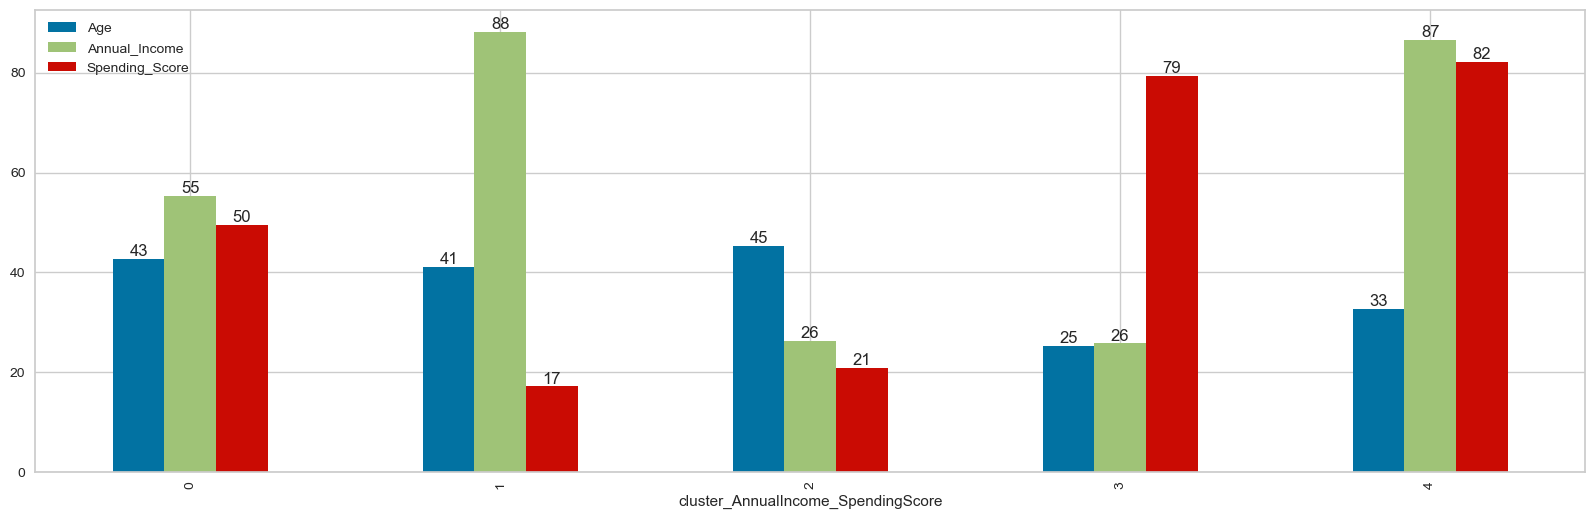

In [579]:
ax = df.groupby("cluster_AnnualIncome_SpendingScore").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___